# Load Replay

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
replay_json = input()
#df = pd.read_json("EUW1-5237530168.rofl.json")
df = pd.read_json(replay_json)
df = df.sort_values(by=["time"])

EUW1-5270795542.rofl.json


In [3]:
champs = pd.DataFrame(pd.concat([df["time"], df["champs"]], axis=1, keys=['time', 'champs']))
champs

time                                             champs
0         2.010997  [{"id": 2624, "name": "varus", "hp": 530.0, "m...
1         2.127793  [{"id": 2624, "name": "varus", "hp": 530.0, "m...
2         2.194533  [{"id": 2624, "name": "varus", "hp": 530.0, "m...
3         2.261273  [{"id": 2624, "name": "varus", "hp": 530.0, "m...
4         2.328013  [{"id": 2624, "name": "varus", "hp": 530.0, "m...
...            ...                                                ...
12032  1230.322632  [{"id": 2624, "name": "varus", "hp": 1408.5250...
12031  1230.322632  [{"id": 2624, "name": "varus", "hp": 1408.5250...
12030  1230.322632  [{"id": 2624, "name": "varus", "hp": 1408.5250...
12040  1230.322632  [{"id": 2624, "name": "varus", "hp": 1408.5250...
12104  1230.322632  [{"id": 2624, "name": "varus", "hp": 1408.5250...

[12105 rows x 2 columns]

# Object Category Analysis

In [4]:
champs.columns

Index(['time', 'champs'], dtype='object')

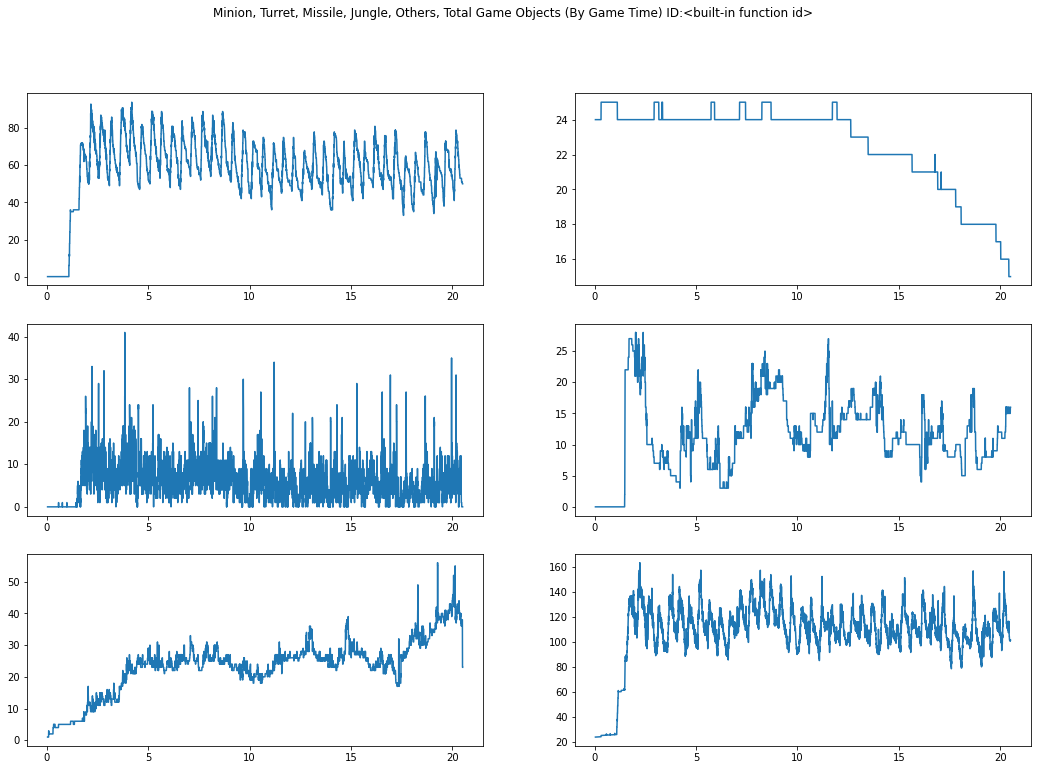

In [5]:
# Data
cur = df[(df["time"] > 60*0) & (df["time"] < 60*35)]
cur["time_mins"]     = cur["time"].apply(lambda x: x / 60)
cur["minion_count"]  = cur["minions"].apply(lambda x: len(x))
cur["turret_count"]  = cur["turrets"].apply(lambda x: len(x))
cur["jungle_count"]  = cur["jungle"].apply(lambda x: len(x))
cur["missile_count"] = cur["missiles"].apply(lambda x: len(x))
cur["others_count"]  = cur["others"].apply(lambda x: len(x))
cur["total_count"]   = cur.iloc[:, -6:-1].sum(axis=1)

# Set Plot Size
plt.rcParams["figure.figsize"] = (6*3, 6*2)

# Plotting
fig = plt.figure()
fig.suptitle( \
    'Minion, Turret, Missile, Jungle, Others, Total Game Objects (By Game Time) ID:{}' \
    .format(id))

plt.subplot(3, 2, 1)
plt.plot(cur["time_mins"], cur["minion_count"])

plt.subplot(3, 2, 2)
plt.plot(cur["time_mins"], cur["turret_count"])

plt.subplot(3, 2, 3)
plt.plot(cur["time_mins"], cur["missile_count"])

plt.subplot(3, 2, 4)
plt.plot(cur["time_mins"], cur["jungle_count"])

plt.subplot(3, 2, 5)
plt.plot(cur["time_mins"], cur["others_count"])

plt.subplot(3, 2, 6)
plt.plot(cur["time_mins"], cur["total_count"])

In [6]:
champs_corrected = {}

#print(champs)


# Correct the Champions (They're not guarenteed to be in order)
for i in range(10):
  cur_times  = pd.DataFrame(champs["time"])
  cur_champs = champs["champs"].apply(lambda x: x[i])

  cur_champs = pd.read_json("\n".join(cur_champs.tolist()), lines=True)
  cur_champs = cur_times.join(cur_champs)

  names = pd.unique(cur_champs["name"])
  for n in names:
    if not n in champs_corrected:
      champs_corrected[n] = pd.DataFrame()
    champs_corrected[n] = \
      pd.DataFrame.append(champs_corrected[n], cur_champs[cur_champs["name"] == n])
  #print(pd.unique(cur_champs["name"]))

# Sort the champs
for n in champs_corrected:
  champs_corrected[n] = champs_corrected[n].sort_values(by=["time"])

In [8]:
champ_names_for_game = champs_corrected.keys()
print(champ_names_for_game)
champs_corrected["varus"].info()

dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12609 entries, 0 to 12012
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         12609 non-null  float64
 1   id           12609 non-null  int64  
 2   name         12609 non-null  object 
 3   hp           12609 non-null  float64
 4   maxHp        12609 non-null  float64
 5   ad           12609 non-null  float64
 6   armor        12609 non-null  float64
 7   mr           12609 non-null  float64
 8   movSpd       12609 non-null  float64
 9   alive        12609 non-null  bool   
 10  pos_x        12609 non-null  float64
 11  pos_y        12609 non-null  float64
 12  pos_z        12609 non-null  float64
 13  prev_pos_x   12609 non-null  float64
 14  prev_pos_y   12609 non-null  float64
 15  prev_pos_z   12609 non-null  float64
 16  visible      12609 non-

# 2D-Map Analysis

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])


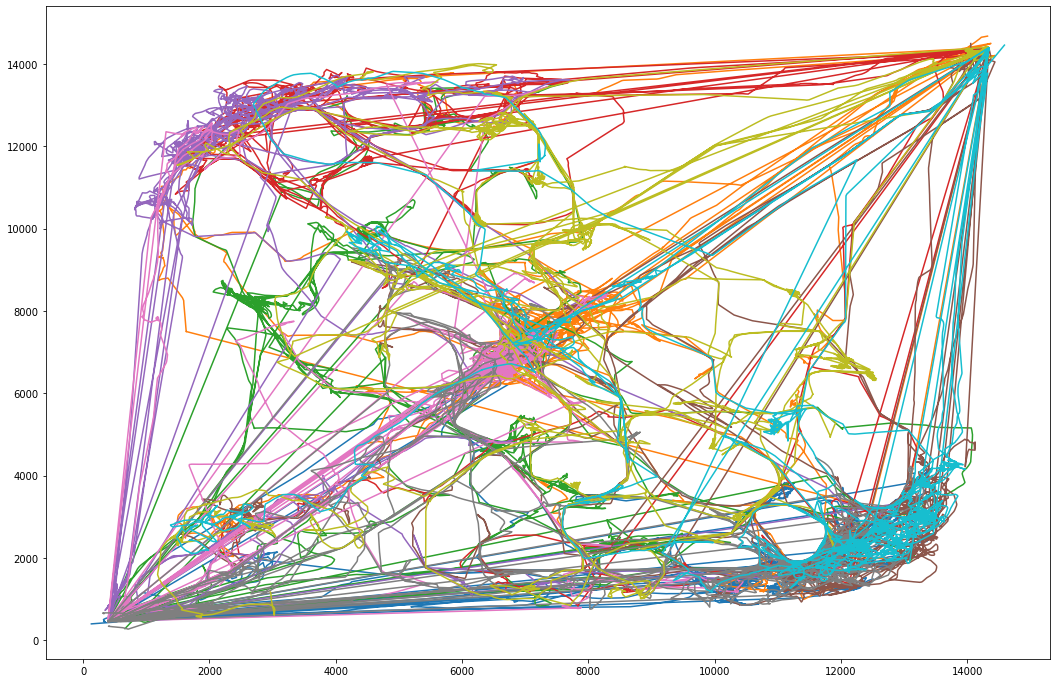

In [9]:
def plot_map(champ_list):
    #champ_names_for_game = champs_corrected.keys()
    print('champ name list:', champ_list)

    """
    for c in champs_corrected:
      plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    """

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    #cs = ["kindred"]
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
champ_names = champs_corrected.keys()
plot_map(champ_names)

# Split Champ Positions into Global Intent Regions

## Calculate Global Intent Region Parameters

In [10]:
global_region_mult = 2
map_dim  = 16_000
map_width = map_height = map_dim
map_n = int(map_dim / 1000) * global_region_mult
global_intent_region_size = int(map_dim / map_n)
print("Map Region Count, Map Region Size:", map_n, (global_intent_region_size, global_intent_region_size))

Map Region Count, Map Region Size: 32 (500, 500)


## View Global Intent Regions as Line Graph

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])


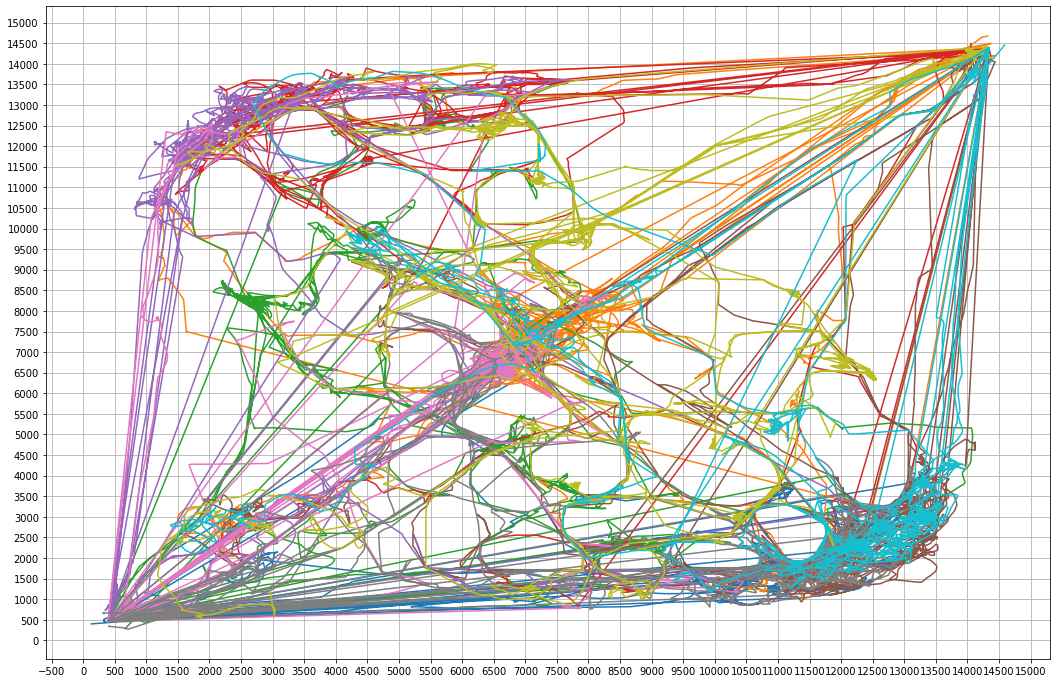

In [11]:
import matplotlib.ticker as plticker

# plot map again with global intent regions
def plot_map_global(champ_list, intervals):
    #champ_names_for_game = champs_corrected.keys()
    print('champ name list:', champ_list)
    
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    """
    for c in champs_corrected:
      plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    """

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    #cs = ["kindred"]
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        ax.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    
champ_names = champs_corrected.keys()
plot_map_global(champ_names, global_intent_region_size)

## View Global Intent Regions as Scatter Plot

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])


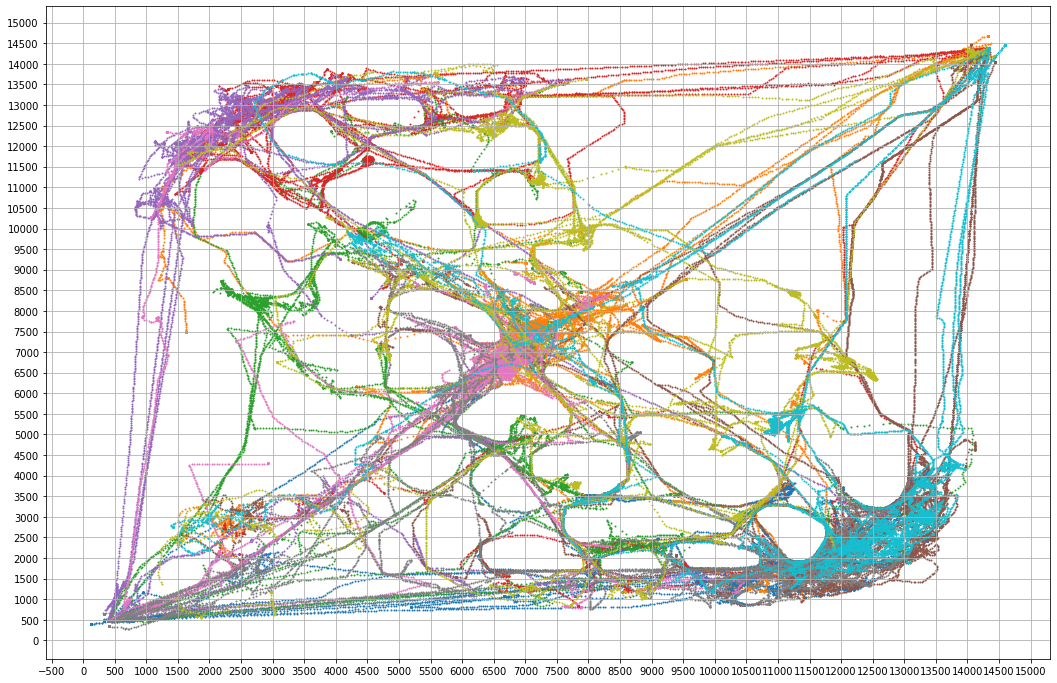

In [12]:
def plot_map_global_scatter(champ_list, intervals):
    #champ_names_for_game = champs_corrected.keys()
    print('champ name list:', champ_list)
    
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    """
    for c in champs_corrected:
      plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    """

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    #cs = ["kindred"]
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        # ax.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
        ax.scatter(champs_corrected[c].pos_x, champs_corrected[c].pos_z, s=1)
    
champ_names = champs_corrected.keys()
plot_map_global_scatter(champ_names, global_intent_region_size)

## View Global Intent Regions as Quiver Plot (Vector between prev, cur)

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])


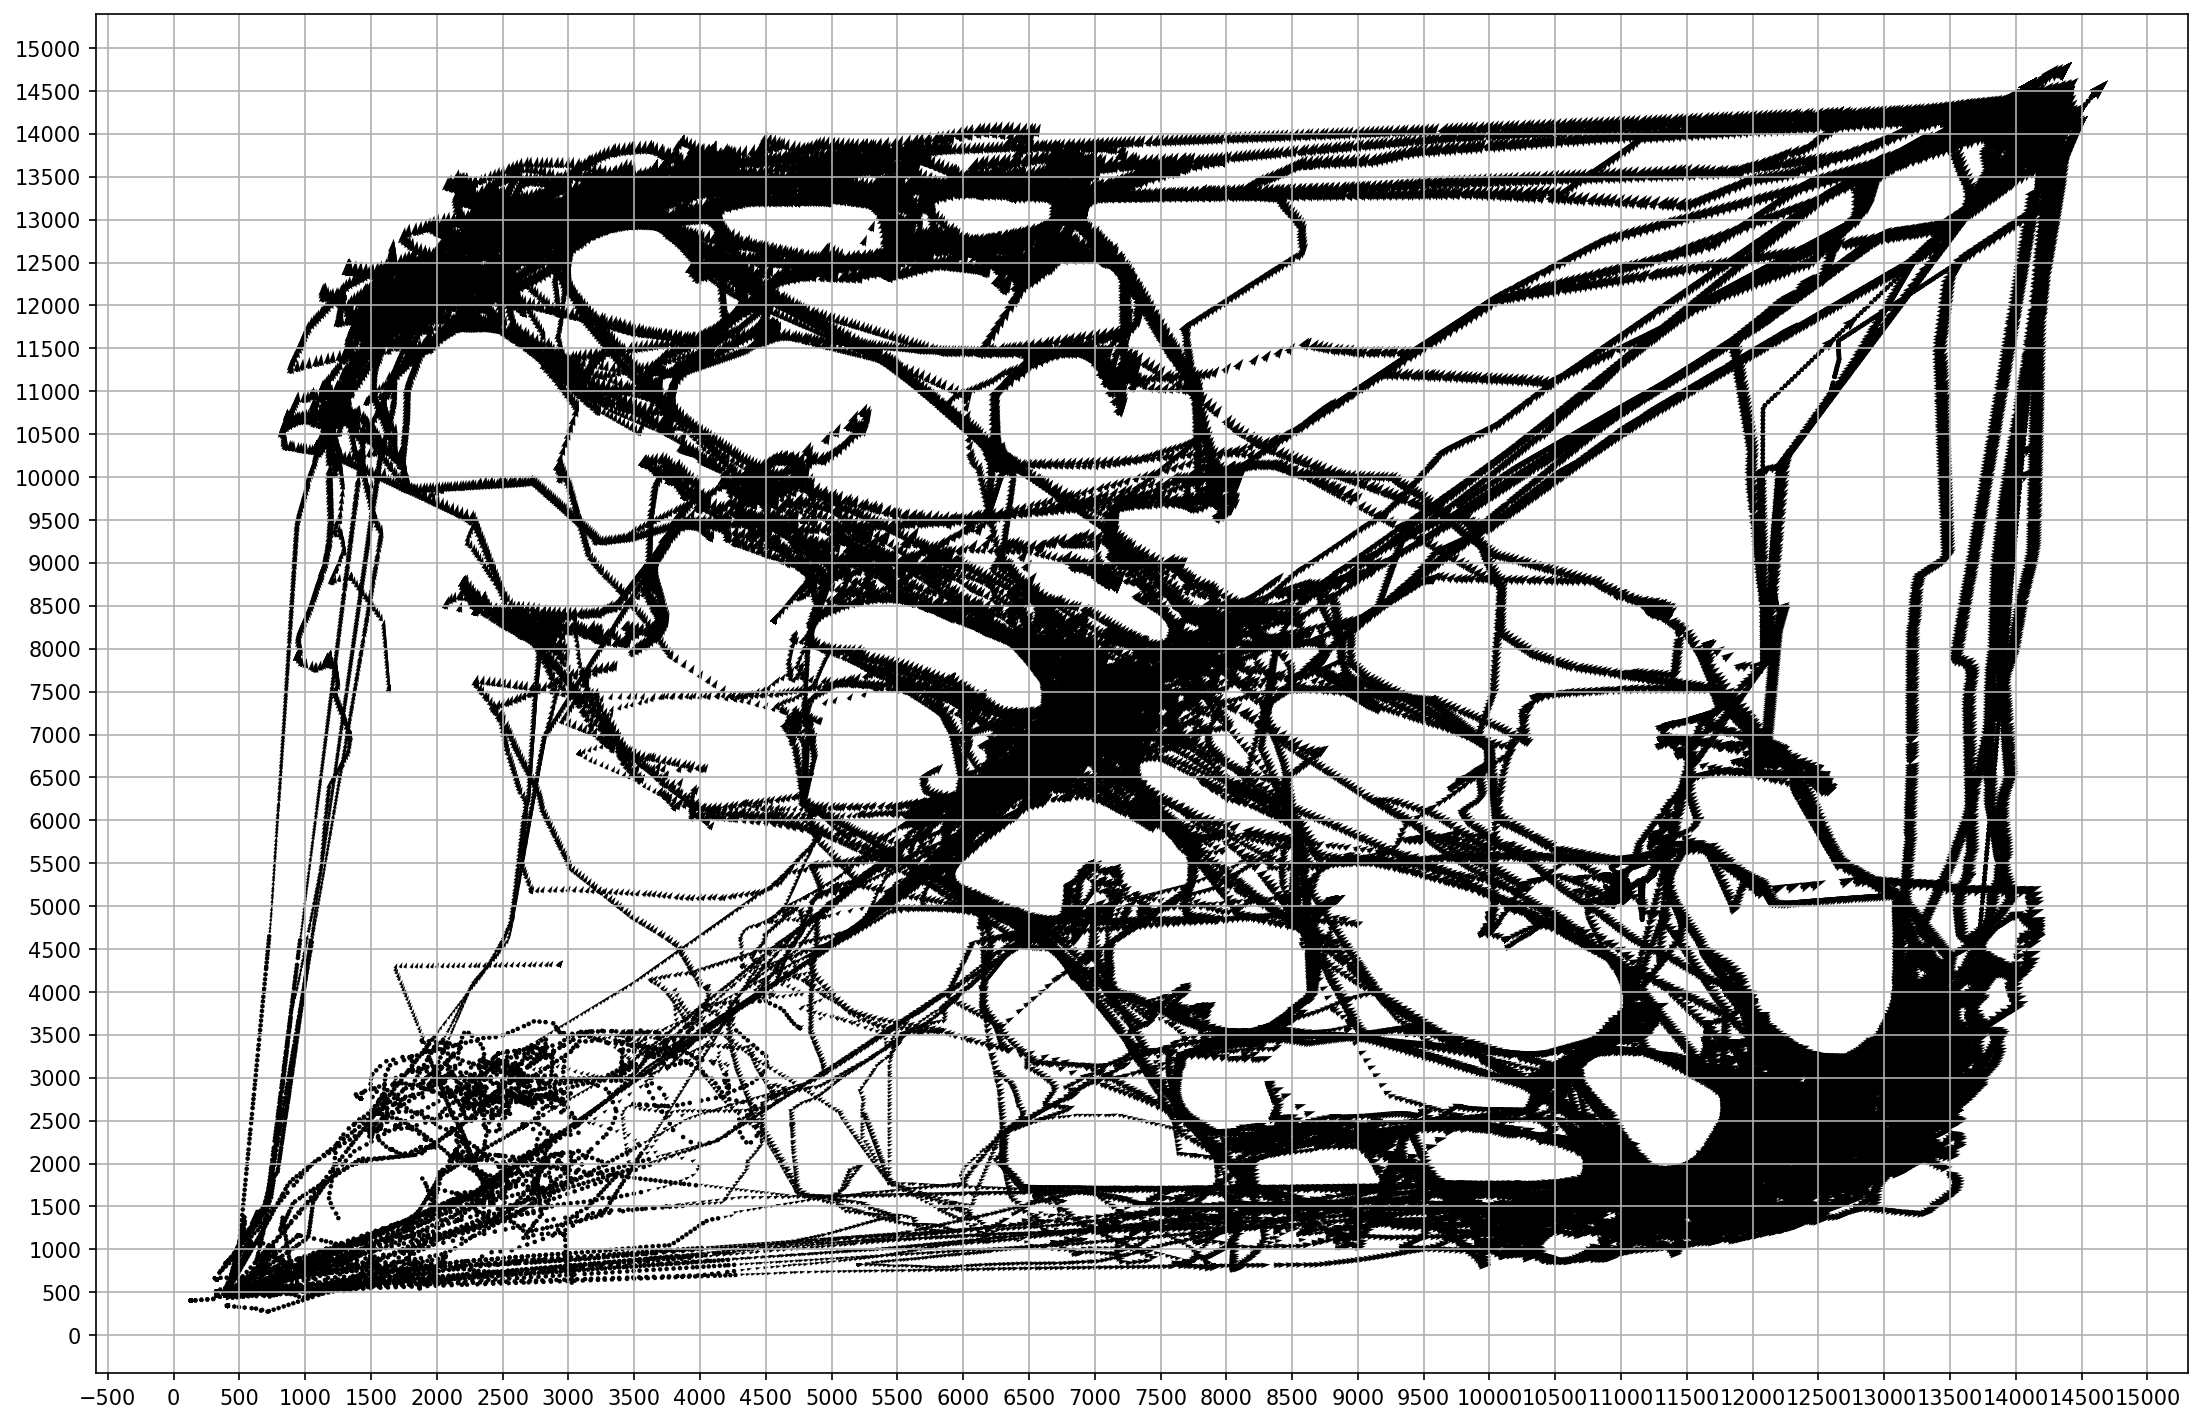

In [52]:
def plot_map_global_quiver(champ_list, intervals):
    #champ_names_for_game = champs_corrected.keys()
    print('champ name list:', champ_list)
    
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    """
    for c in champs_corrected:
      plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    """

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    #cs = ["kindred"]
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        # ax.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
        x = champs_corrected[c].pos_x
        y = champs_corrected[c].pos_z
        u = champs_corrected[c].prev_pos_x
        v = champs_corrected[c].prev_pos_z
        ax.quiver(x, y, u, v)
    
champ_names = champs_corrected.keys()
plot_map_global_quiver(champ_names, global_intent_region_size)

## View Global Intent Regions as Scatter Plot (Specific Minute)

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])


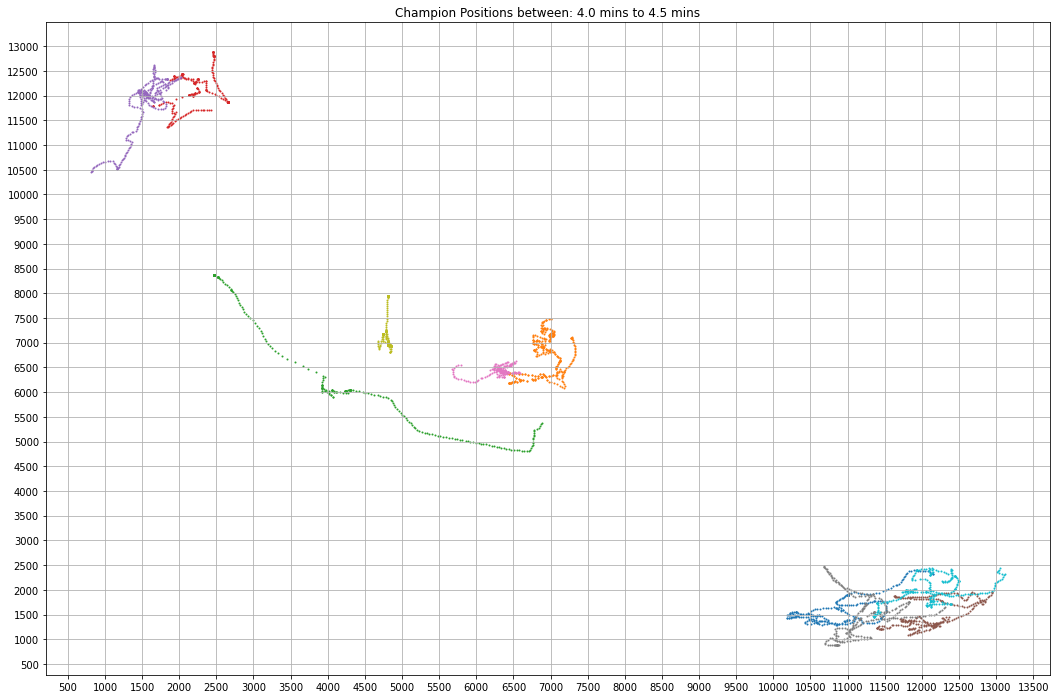

In [13]:
def plot_map_global_scatter_timestep(timestep, champ_list, intervals, seconds=60.0):
    #champ_names_for_game = champs_corrected.keys()
    print('champ name list:', champ_list)
    
    timestep *= seconds
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    """
    for c in champs_corrected:
      plt.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
    """

    # remove (0, 0) rows from a champ
    
    plt.title(f"Champion Positions between: {timestep / 60.0} mins to {(timestep + seconds) / 60.0} mins")
    
    cs = list(champ_list)
    #cs = ["kindred"]
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        # ax.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
        cur_champ = \
            champs_corrected[c][champs_corrected[c].time > timestep]
        cur_champ = \
            cur_champ[cur_champ.time < timestep + seconds]
        
        ax.scatter(cur_champ.pos_x, cur_champ.pos_z, s=1)
    
champ_names = champs_corrected.keys()
plot_map_global_scatter_timestep(8, champ_names, global_intent_region_size, seconds=30)


## Animate Scatter Plot over Global Intent Regions (over Time)

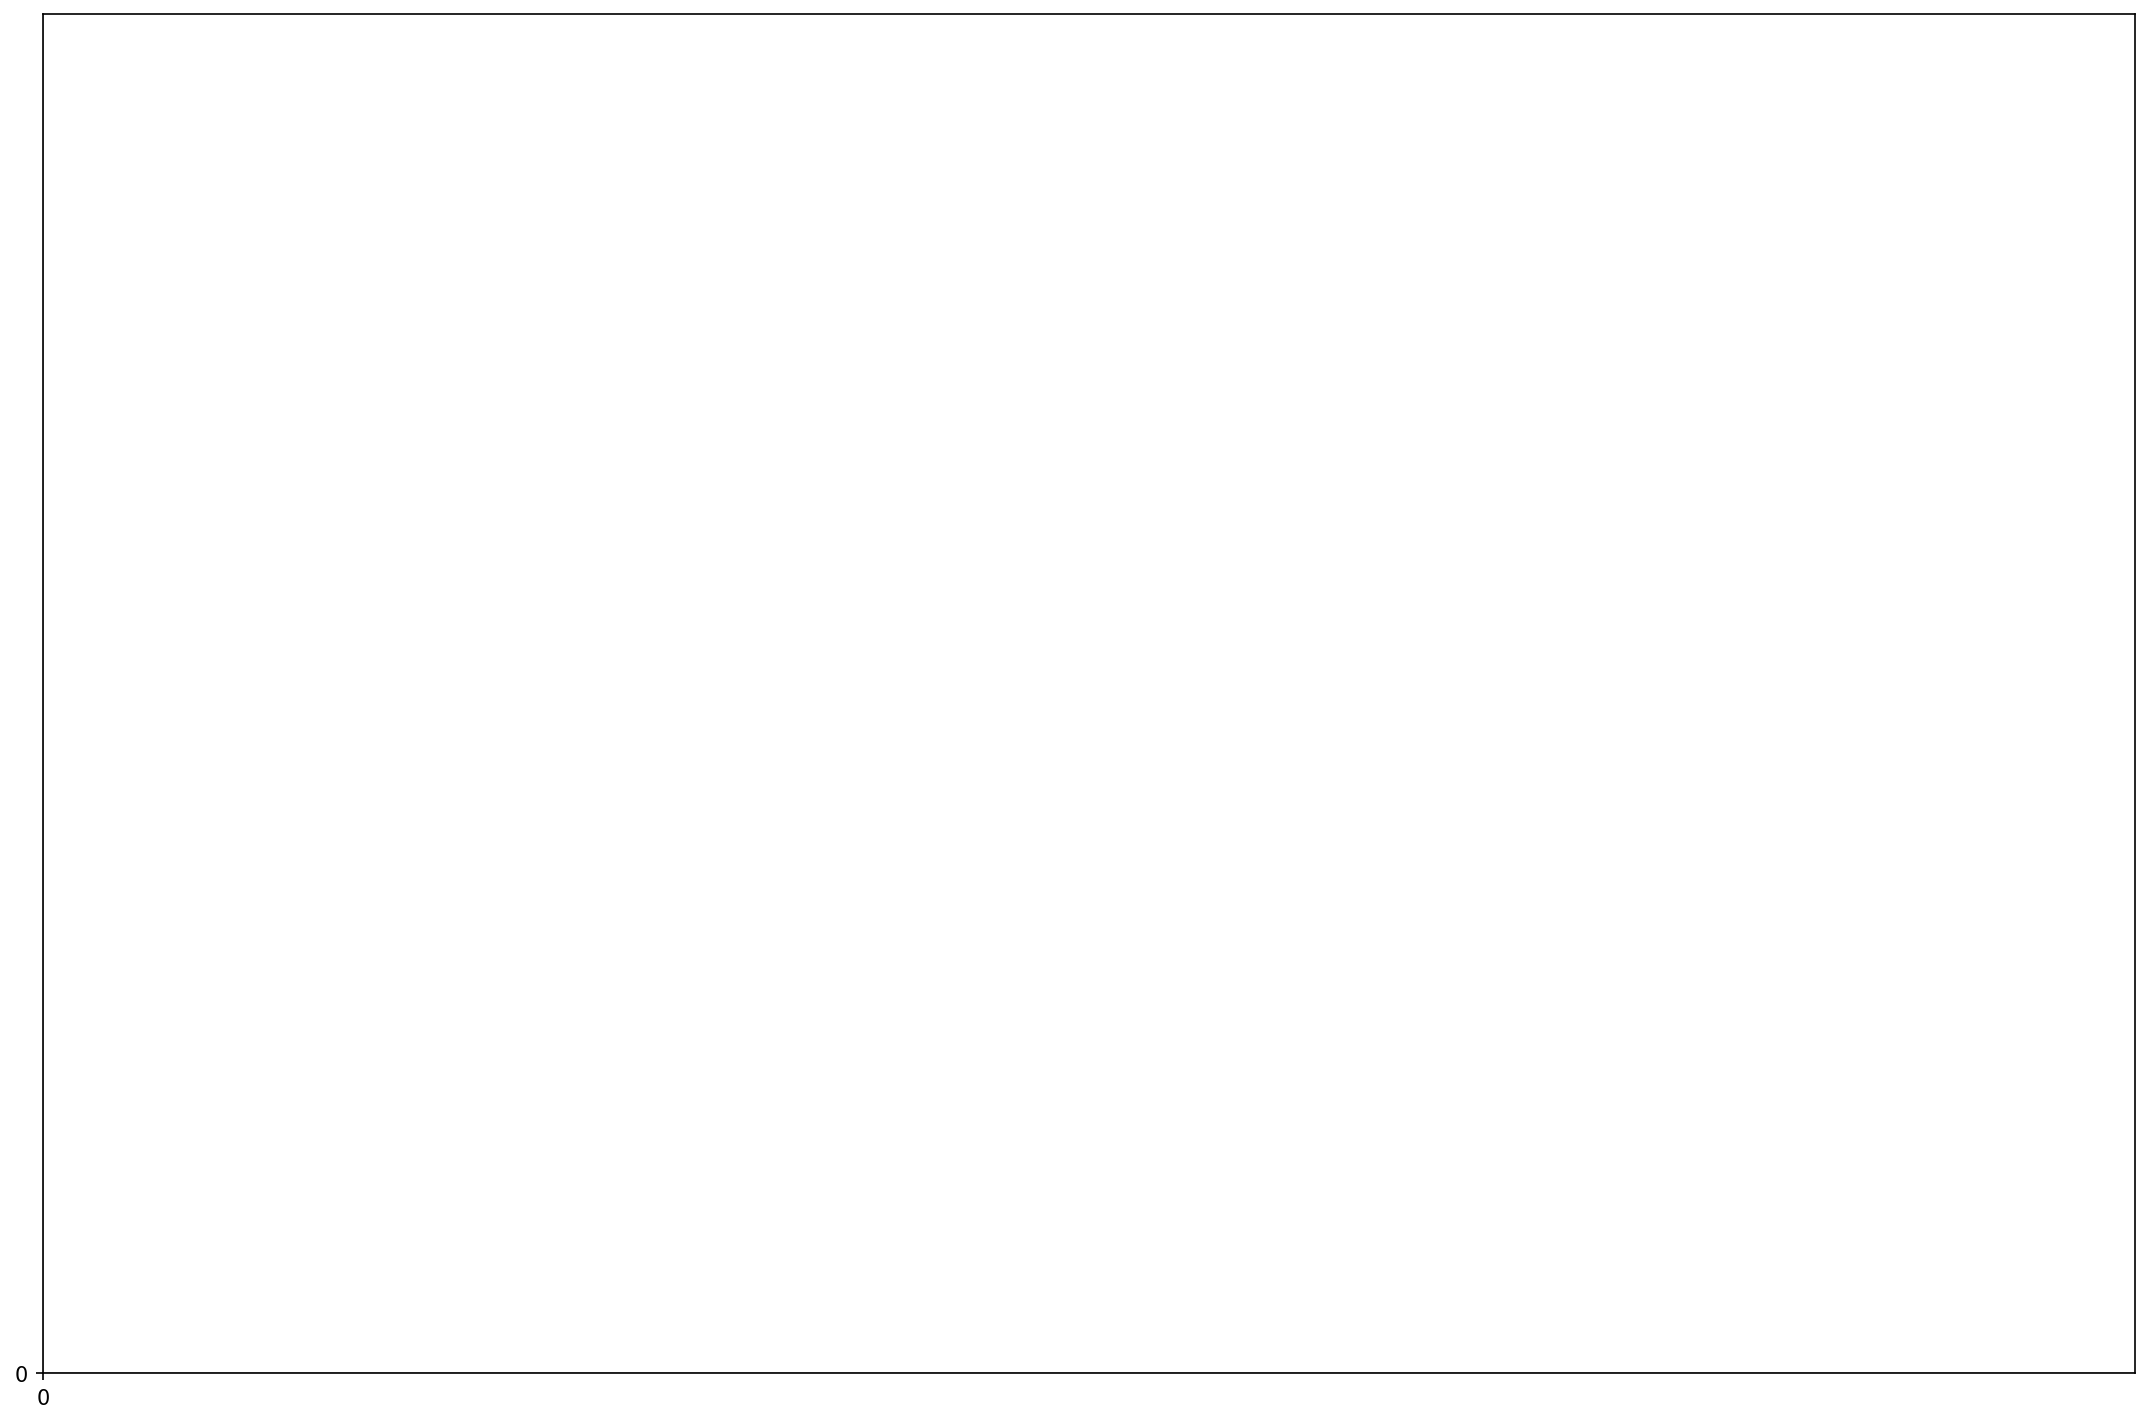

In [14]:
anim = False # false by default as it's memory-heavy
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

intervals = global_intent_region_size
loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(axis='both', linestyle='-')

seconds = 60.0

def animate(t):
    ax.cla()
    timestep = float(t) * seconds
    plt.title(f"Champion Positions between: {timestep / 60.0} mins to {(timestep + seconds) / 60.0} mins")
    print('t:', t)
    for c in cs:
        #new_c = champs_corrected[c][champs_corrected[c].pos_x > 0]
        #new_c = champs_corrected[c][champs_corrected[c].pos_y > 0]
        #plt.plot(new_c.pos_x, new_c.pos_z)
        # ax.plot(champs_corrected[c].pos_x, champs_corrected[c].pos_z)
        cur_champ = \
            champs_corrected[c][champs_corrected[c].time > 0]
        cur_champ = \
            cur_champ[cur_champ.time < timestep + seconds]
        ax.scatter(cur_champ.pos_x, cur_champ.pos_z, s=1)
    #ax.plot()
    
if anim:
    anim_frames = int(math.ceil(df["time"].max() / seconds) / 2)
    # anim_frames = 2
    matplotlib.animation.FuncAnimation(fig, animate, frames=anim_frames)

# View Transitions Between Global Intent Regions

## Display Heatmap (each position occurrence within each Region, Unnormalised & Log10 Normalised)

### Unnormalised Heatmap

[[839. 208.  15. ...   0.   0.   0.]
 [220. 909. 758. ...   0.   0.   0.]
 [ 10. 324. 108. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


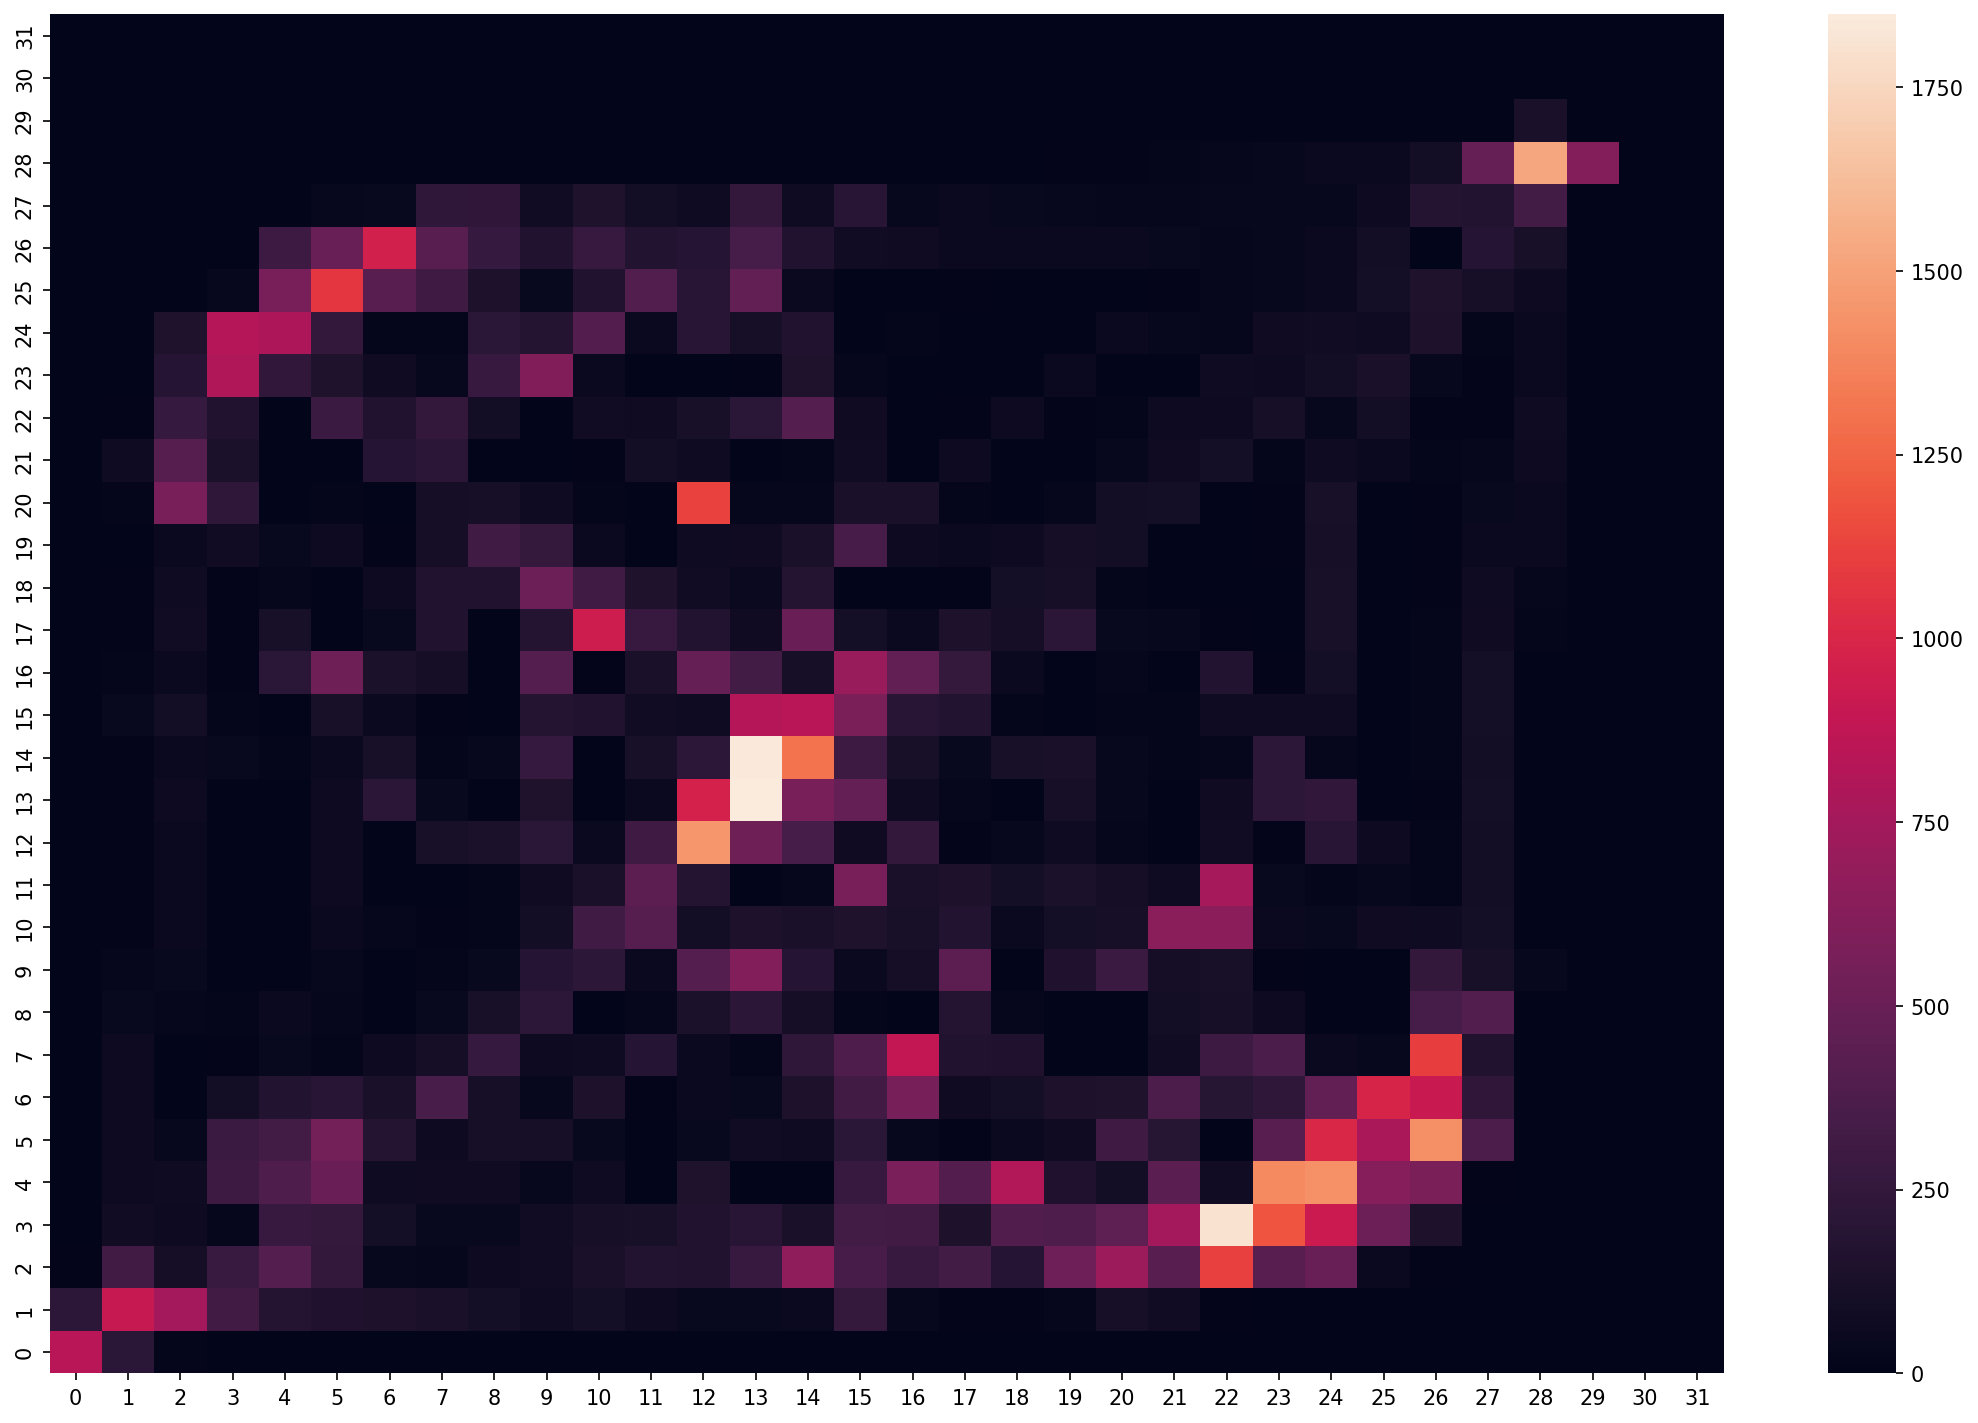

In [15]:
import math
import sys
def global_heatmap(cs):
    # NOTE: Numpy addressing is [row, col] || [y, x]
    import seaborn as sns
    from numpy import interp
    global_intent_sum_matrix = np.zeros((map_n, map_n))
    #%%timeit
    def inc_global_region(row, global_intent_sum_matrix):
        # Gets `N` global intent region for current row for champ
        x_n = math.floor(interp(row.pos_x, [0, 16000], [0, map_n]))
        y_n = math.floor(interp(row.pos_z, [0, 16000], [0, map_n]))
        global_intent_sum_matrix[y_n, x_n] += 1

    for c in cs:
        champs_corrected[c].apply(lambda row: inc_global_region(row, global_intent_sum_matrix), axis=1)

    #import sys
    #import numpy as np
    np.set_printoptions(threshold=8)
    # global_intent_sum_matrix = np.log(global_intent_sum_matrix)

    result = global_intent_sum_matrix

    # global_intent_sum_matrix /= 8 # convert from 8hz to 1hz
    print(result)
    ax = sns.heatmap(result)
    ax.invert_yaxis()
    return result, global_intent_sum_matrix

champ_names = champs_corrected.keys()
result, global_intent_sum_matrix = global_heatmap(champ_names)

### Normalised Heatmap (Log10)

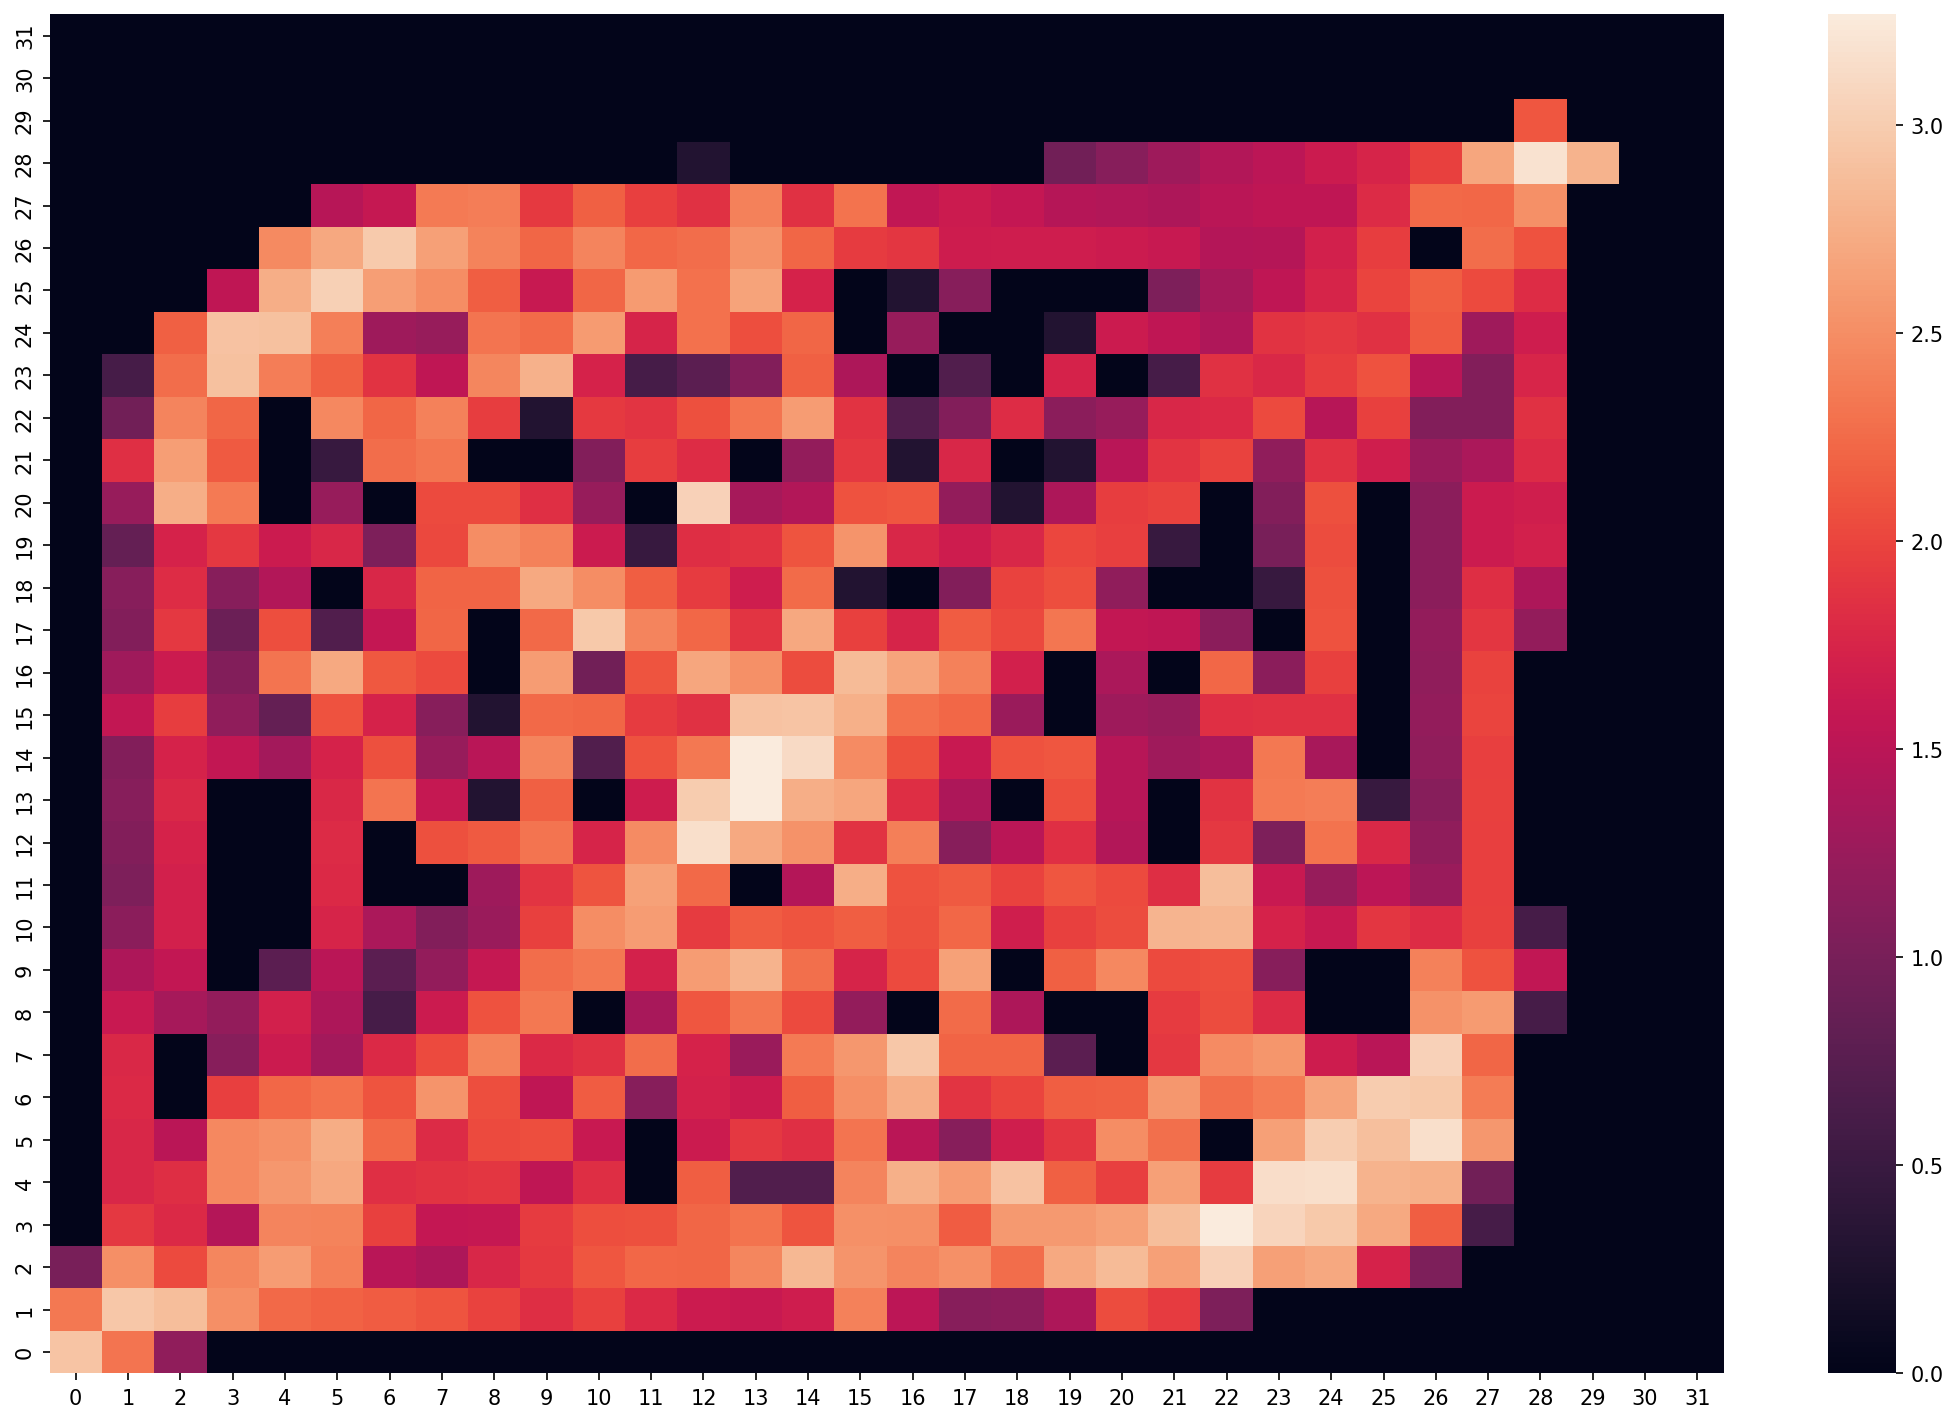

In [17]:
import seaborn as sns
def global_heatmap_normalised(cs, result):
    result = np.where(global_intent_sum_matrix > 0.0000001, global_intent_sum_matrix, 0)
    np.log10(result, out=result, where=result > 0)

    ax = sns.heatmap(result)
    ax.invert_yaxis()
global_heatmap_normalised(champ_names, result)

# Split Champ Positions into Local Intent Regions

## Set Local Intent Region Settings

In [18]:
map_m = int(global_intent_region_size / 50)
local_intent_region_size = int(global_intent_region_size / map_m)
print("Local Region Count, Local Region Size:", map_m, (global_intent_region_size, global_intent_region_size))

Local Region Count, Local Region Size: 10 (500, 500)


## Get Global Intent Region with Highest Movement Activity

In [19]:
highest_activity_1d = result.argmax()
print("1D-index of highest activity region:", highest_activity_1d)

1D-index of highest activity region: 429


In [20]:
from numpy import unravel_index
highest_activity_2d = \
    unravel_index(global_intent_sum_matrix.argmax(), global_intent_sum_matrix.shape)
highest_activity_2d

(13, 13)

## Plot Global Intent Region with Highest Movement Activity

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
6500 6500
total number of points in local region: 1849


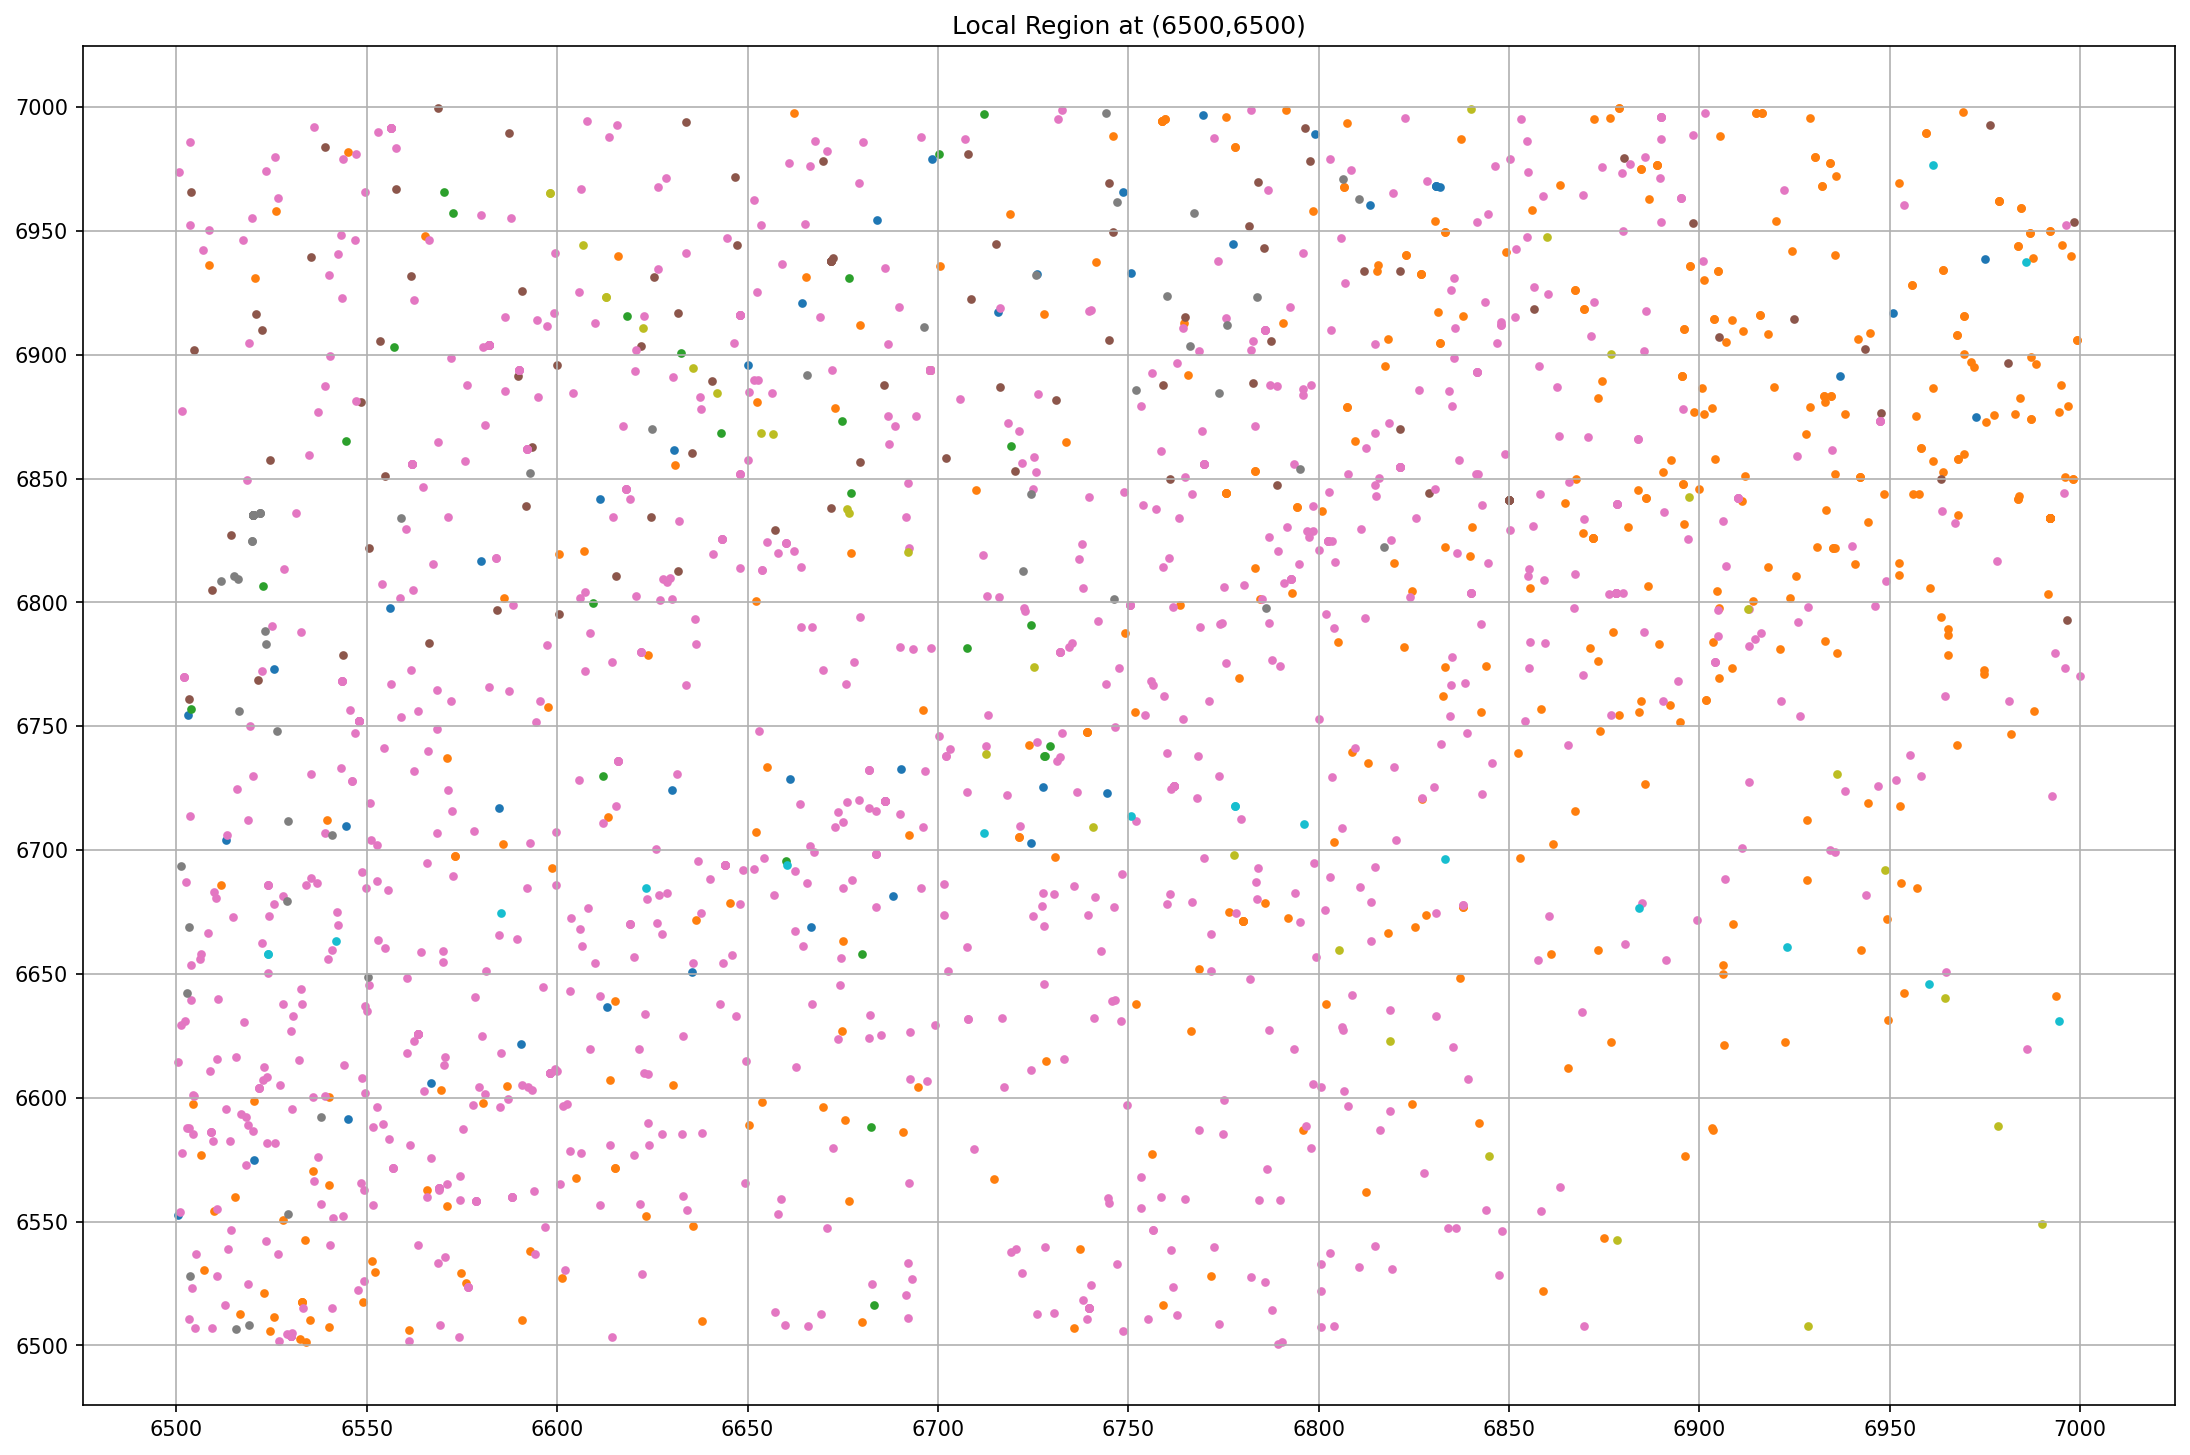

In [21]:
def get_local_actions(row, x_off, y_off):
    # global_intent_region_size
    x = row.pos_x
    y = row.pos_z
    #print(x, y)
    if   x < x_off or x > x_off + global_intent_region_size * 1:
        return False
    elif y < x_off or y > x_off + global_intent_region_size * 1:
        return False
    else:
        return True

def get_local_actions_only(x_off, y_off, champ_series):
    print(x_off, y_off)
    x_start = x_off
    x_end   = x_off + global_intent_region_size
    y_start = y_off
    y_end   = y_off + global_intent_region_size
    mask = champ_series.apply(lambda row:\
                              get_local_actions(row, x_off, y_off), axis=1)
    champ_series = champ_series[mask]
    return champ_series
    
def plot_map_local_scatter(champ_list, intervals, pos):
    print('champ name list:', champ_list)
    
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    plt.title(f"Local Region at ({pos[0]*global_intent_region_size},{pos[1]*global_intent_region_size})")

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    lens = 0
    for c in cs:
        cur_champ = get_local_actions_only(
            x_off=pos[0] * global_intent_region_size,
            y_off=pos[1] * global_intent_region_size,
            champ_series=champs_corrected[c],
        )
        lens += len(cur_champ)
        ax.scatter(cur_champ.pos_x, cur_champ.pos_z, s=10)
    print("total number of points in local region:", lens)
    
champ_names = champs_corrected.keys()
plot_map_local_scatter(
    champ_names,
    local_intent_region_size,
    highest_activity_2d)

# View Transitions Between Local Intent Regions

## Display Heatmap (each position occurrence within each Region, Unnormalised & Log10 Normalised)

### Unnormalised Heatmap

x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
x_off, y_off: 6500 6500
6500 6500
[[46. 18.  6. ...  4.  1.  1.]
 [40. 35. 21. ...  3.  2.  1.]
 [33. 35. 16. ...  3.  4.  6.]
 ...
 [ 9. 26. 18. ... 15. 26. 25.]
 [14. 25. 25. ... 20. 19. 21.]
 [16. 17.  8. ... 36. 16. 16.]]


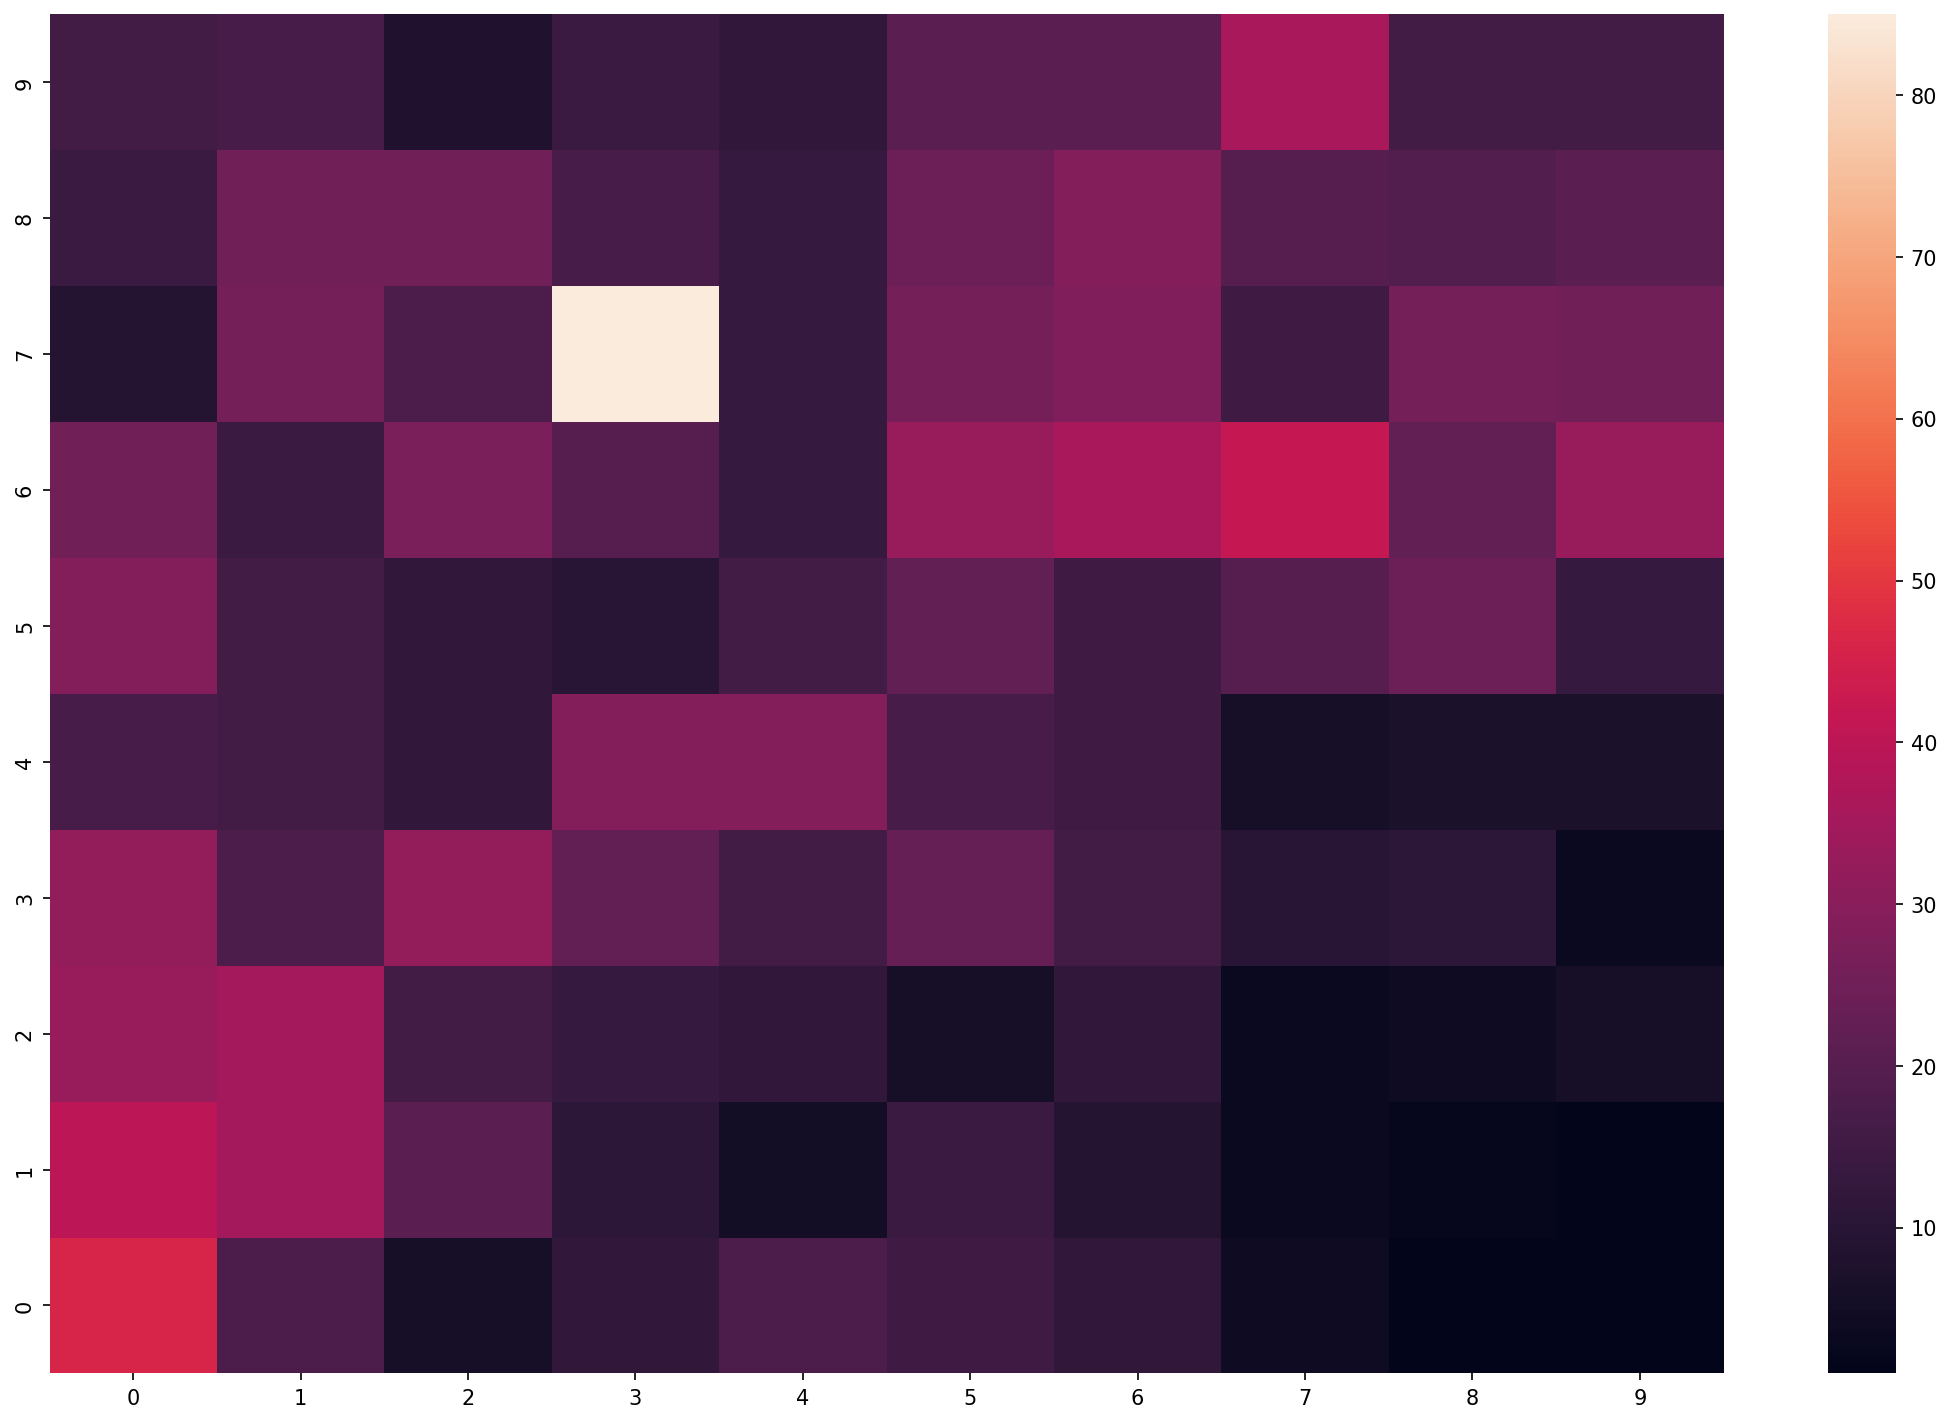

In [31]:
import math
def local_heatmap(cs, pos):
    # NOTE: Numpy addressing is [row, col] || [y, x]
    import seaborn as sns
    from numpy import interp
    local_intent_sum_matrix = np.zeros((map_m, map_m))
    #%%timeit
    def inc_local_region_(row, local_intent_sum_matrix, x_off, y_off):
        # Gets `N` global intent region for current row for champ
        x_n = math.floor(interp(row.pos_x, [x_off + 0, x_off + global_intent_region_size], [0, map_m]))
        y_n = math.floor(interp(row.pos_z, [y_off + 0, y_off + global_intent_region_size], [0, map_m]))
        
        # print('x_n, y_n:', x_n, y_n)
        local_intent_sum_matrix[y_n, x_n] += 1

    for c in cs:
        x_off = pos[0] * global_intent_region_size
        y_off = pos[1] * global_intent_region_size
        print("x_off, y_off:", x_off, y_off)
        cur_champ = get_local_actions_only(
            x_off=x_off,
            y_off=y_off,
            champ_series=champs_corrected[c],
        )
        cur_champ.apply(lambda row: inc_local_region_(row, local_intent_sum_matrix, x_off, y_off), axis=1)

    #import sys
    #import numpy as np
    np.set_printoptions(threshold=8)
    # global_intent_sum_matrix = np.log(global_intent_sum_matrix)

    result_ = local_intent_sum_matrix

    # local_intent_sum_matrix /= 8 # convert from 8hz to 1hz
    print(result_)
    ax = sns.heatmap(result_)
    ax.invert_yaxis()
    
    return result_, local_intent_sum_matrix
champ_names = champs_corrected.keys()
result_, local_intent_sum_matrix = local_heatmap(champ_names, highest_activity_2d)


In [23]:
local_intent_sum_matrix

array([[56., 18., 10., ...,  1.,  1.,  0.],
       [50., 53., 20., ...,  3.,  1.,  0.],
       [34., 28., 17., ...,  7.,  8.,  0.],
       ...,
       [13., 32., 33., ..., 26., 25.,  0.],
       [20., 21., 13., ..., 31., 18.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Normalised Heatmap (Log10)

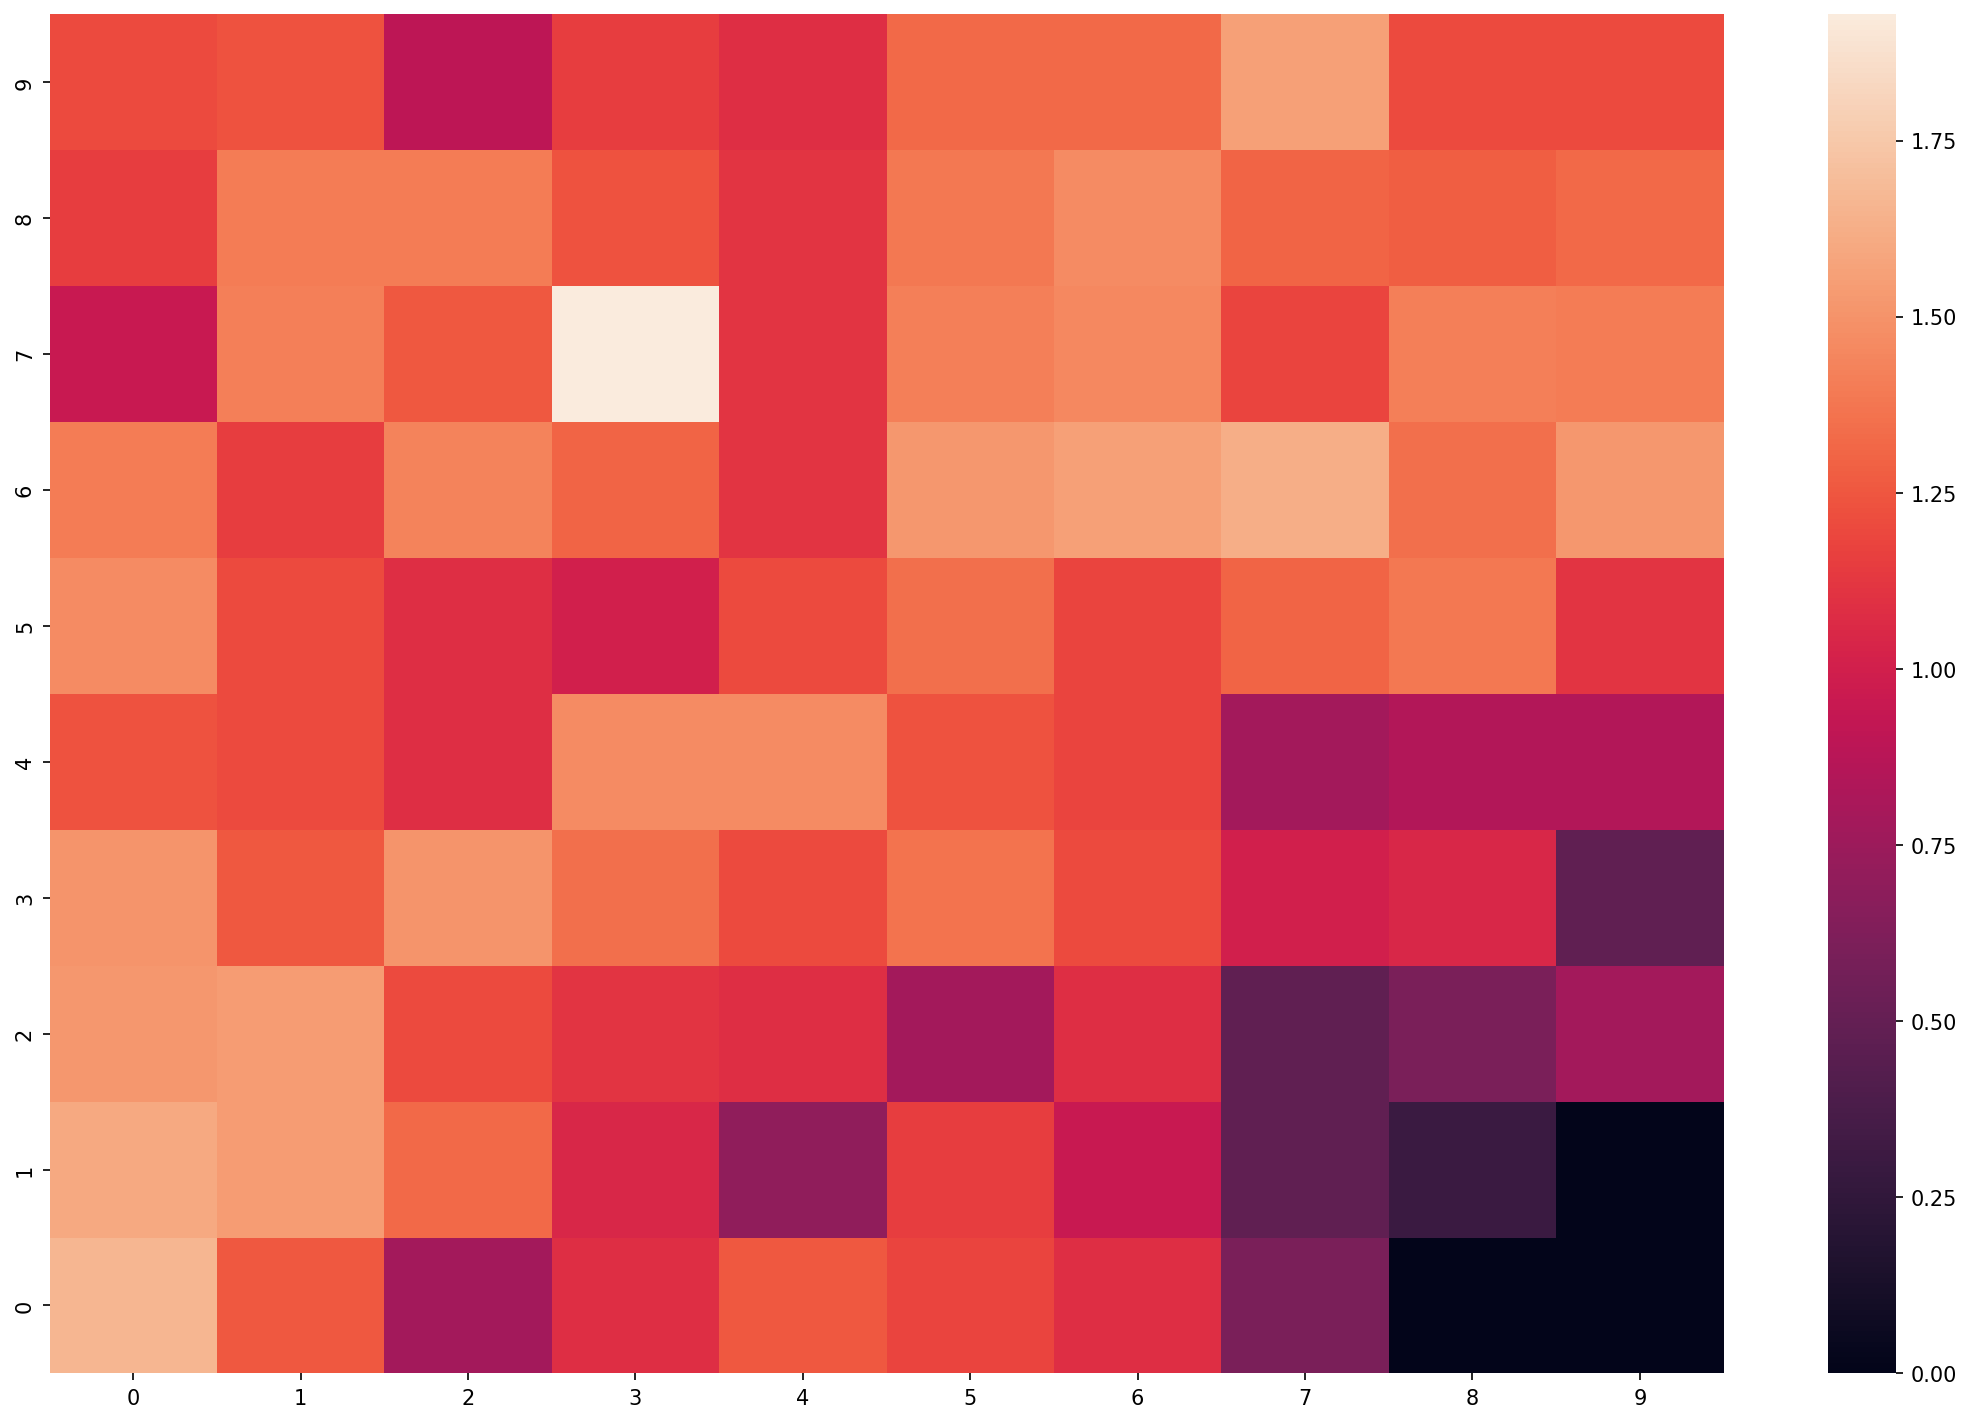

In [32]:
def local_heatmap_normalised(cs, result):
    result = np.where(local_intent_sum_matrix > 0.0000001, local_intent_sum_matrix, 0)
    np.log10(result, out=result, where=result > 0)

    ax = sns.heatmap(result)
    ax.invert_yaxis()
local_heatmap_normalised(champ_names, result_)

# Action Label Classification

champ name list: dict_keys(['varus', 'jayce', 'hecarim', 'ornn', 'darius', 'lux', 'twistedfate', 'zilean', 'udyr', 'jinx'])
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
total number of points in local region: 108


/home/joe/.local/lib/python3.8/site-packages/matplotlib/quiver.py:663: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/joe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


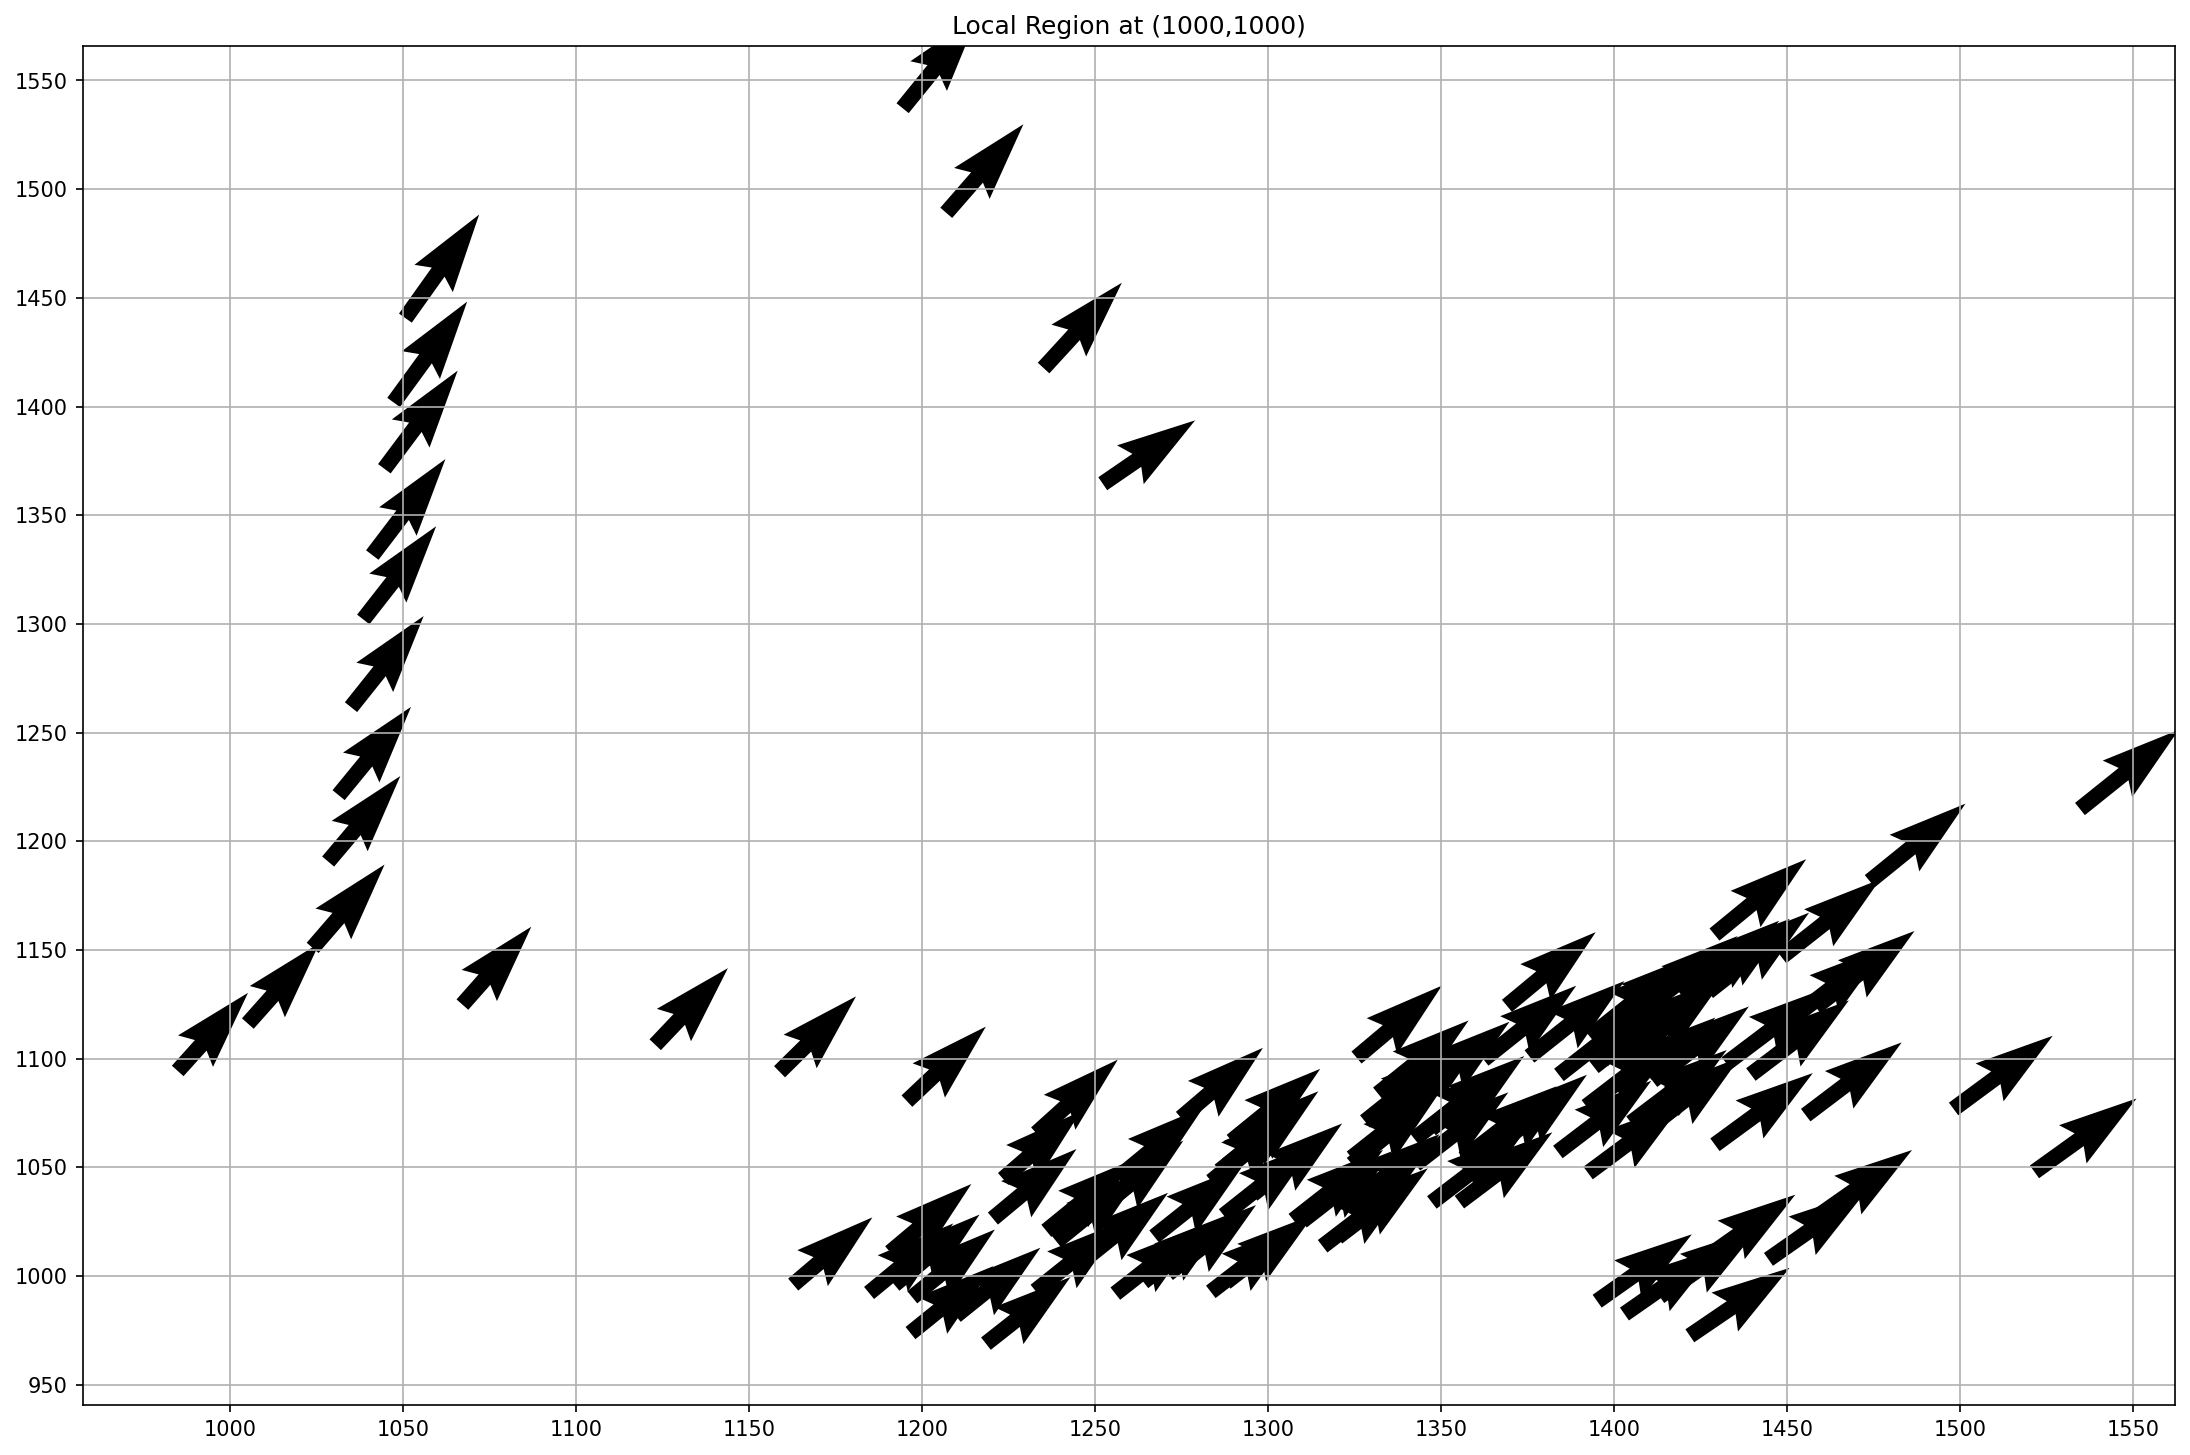

In [51]:
def _get_local_actions(row, x_off, y_off):
    # global_intent_region_size
    x = row.pos_x
    y = row.pos_z
    x_d = row.prev_pos_x
    y_d = row.prev_pos_z
    #print(x, y)
    if   x < x_off or x > x_off + global_intent_region_size * 1:
        return False
    elif y < y_off or y > y_off + global_intent_region_size * 1:
        return False
    elif x_d < x_off or x_d > x_off + global_intent_region_size * 1:
        return False
    elif y_d < y_off or y_d > y_off + global_intent_region_size * 1:
        return False
    else:
        return True

def _get_local_actions_only(x_off, y_off, champ_series):
    print(x_off, y_off)
    mask = champ_series.apply(lambda row:\
                              get_local_actions(row, x_off, y_off), axis=1)
    champ_series = champ_series[mask]
    return champ_series
    
def _plot_map_local_scatter(champ_list, intervals, pos):
    print('champ name list:', champ_list)
    
    fig, ax = plt.subplots()
    
    intervals = intervals
    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    plt.title(f"Local Region at ({pos[0]*global_intent_region_size},{pos[1]*global_intent_region_size})")

    # remove (0, 0) rows from a champ

    cs = list(champ_list)
    lens = 0
    for c in cs:
        cur_champ = _get_local_actions_only(
            x_off=pos[0] * global_intent_region_size,
            y_off=pos[1] * global_intent_region_size,
            champ_series=champs_corrected[c],
        )
        lens += len(cur_champ)
        x = cur_champ.prev_pos_x
        y = cur_champ.prev_pos_z
        u = cur_champ.pos_x
        v = cur_champ.pos_z
        ax.quiver(x, y, u, v)
        #ax.scatter(cur_champ.pos_x, cur_champ.pos_z, s=10)
    print("total number of points in local region:", lens)
    
champ_names = champs_corrected.keys()
_plot_map_local_scatter(
    champ_names,
    local_intent_region_size,
    (2, 2))

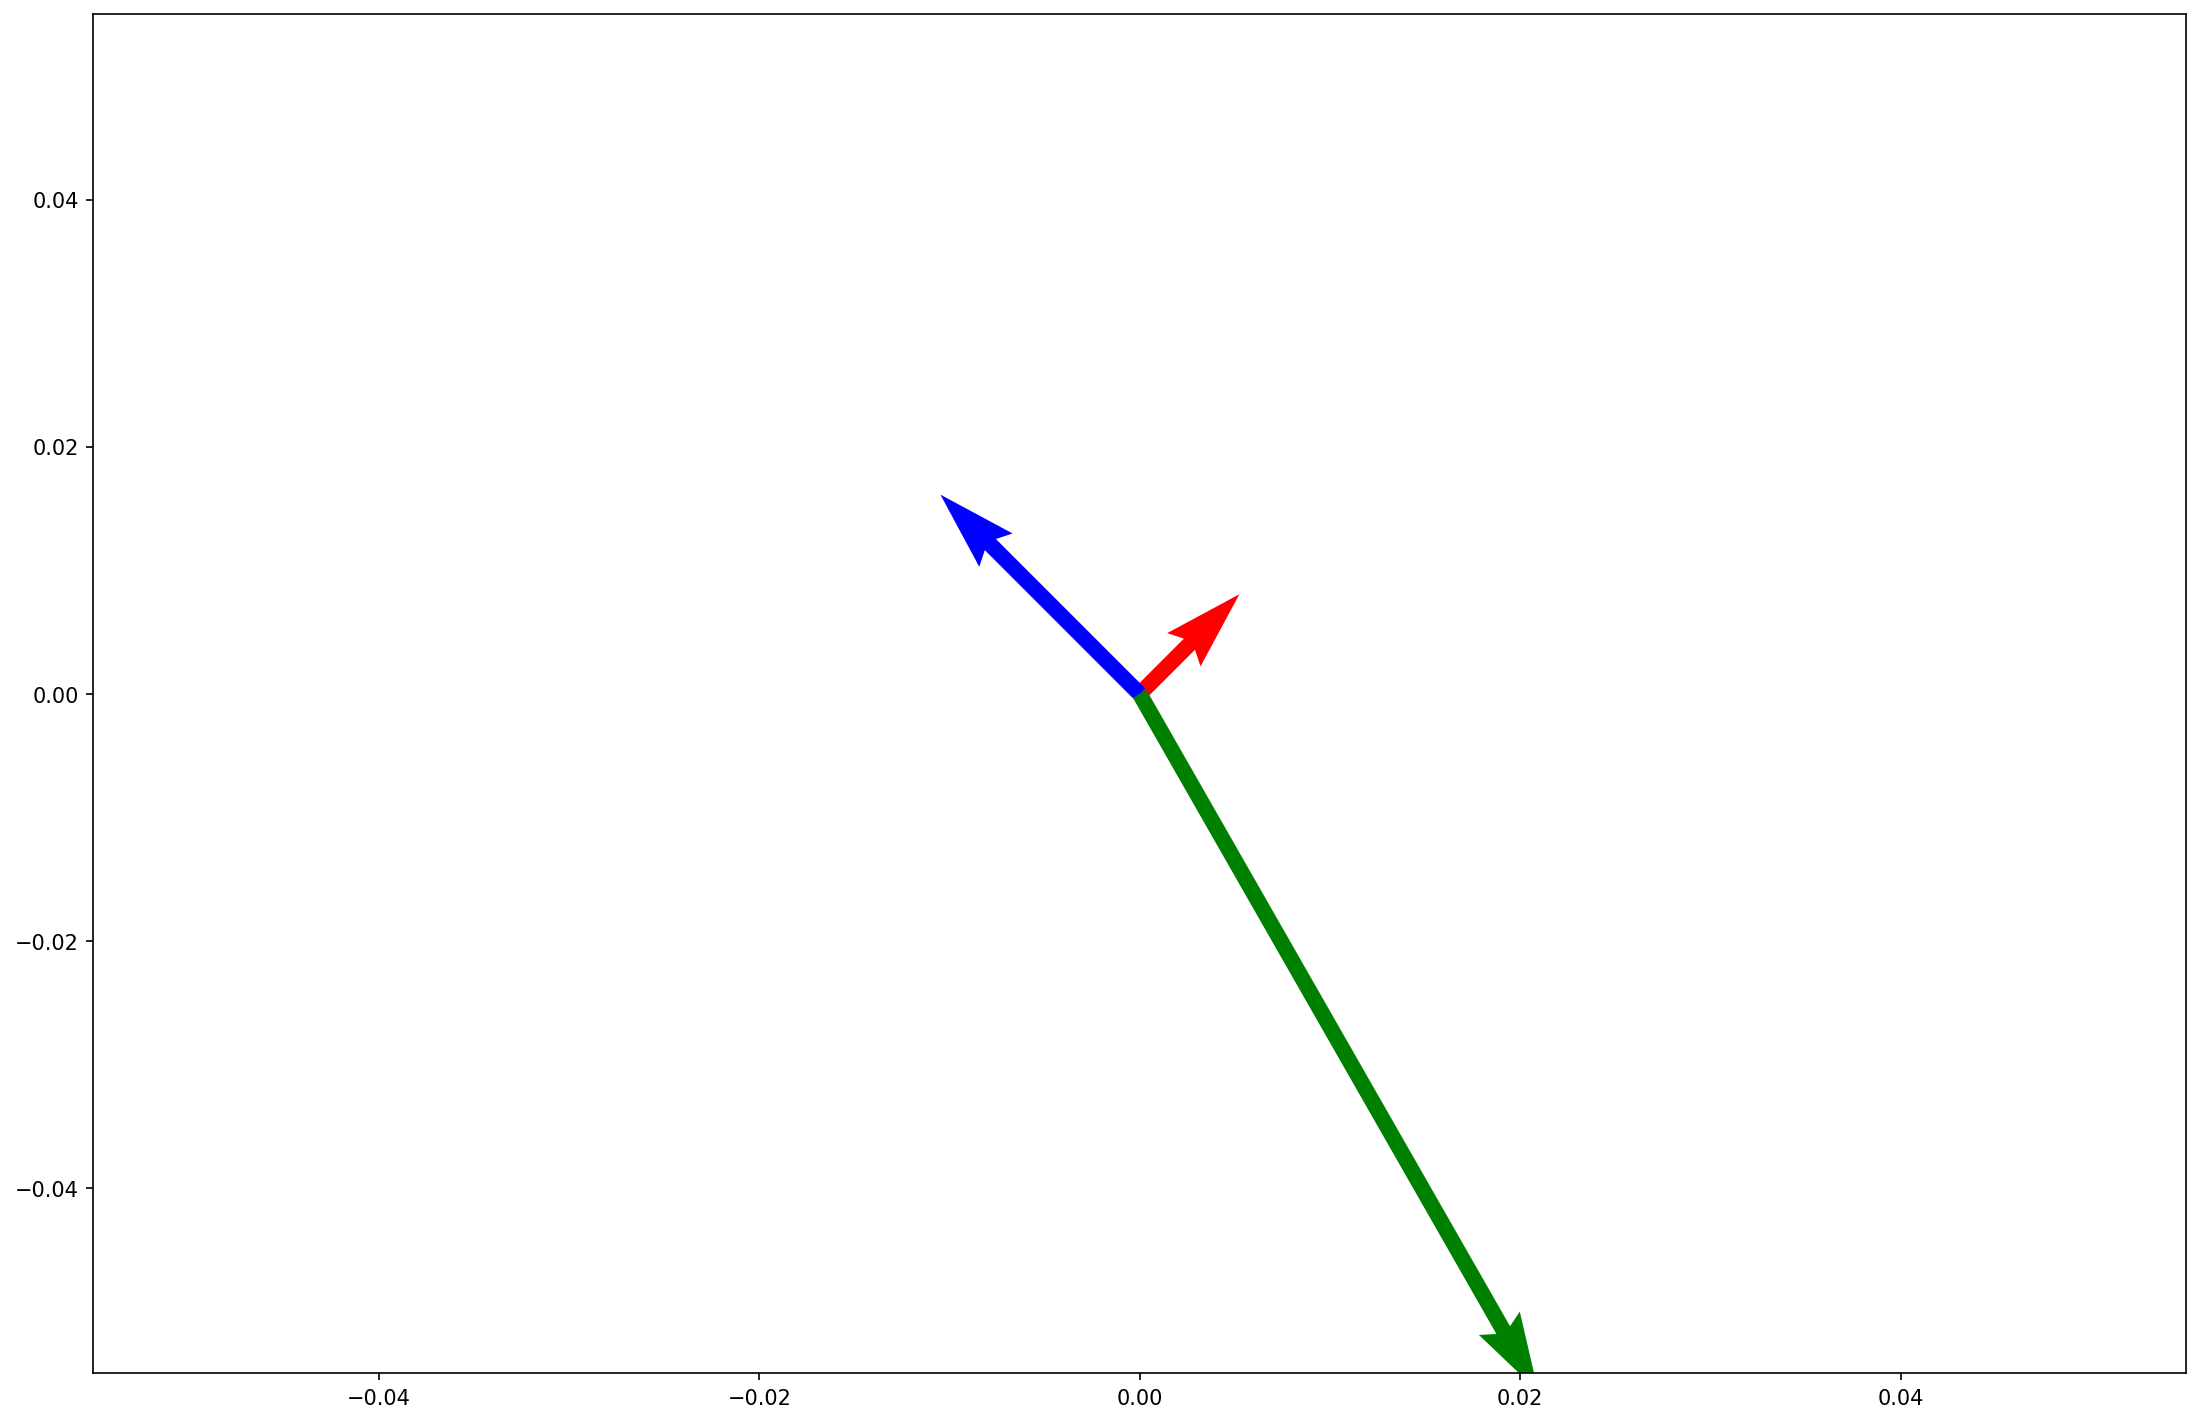

In [34]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()
